# Functional Capstone Project - Data & Analytics



## Business Context

**Infini Telco** is a prominent player in the telco industry with a strong presence in Malaysia. Specializing in B2B sales, they serve as a vital link in the supply chain, facilitating the distribution of telecommunication and technology products to retailers, service providers, and other businesses across the continent. 

Despite their market dominance and expansive product offerings, the company faces critical business challenge related to marketing strategy. A key aspect of this involves the ***identification and segmentation of their customer base into well-defined segments based on discernible patterns in product purchase behaviour and understand their product portfolio.*** By understanding the distinct needs, preferences, and purchasing habits of different customer segments, the client can develop targeted marketing strategies that cater to the specific needs of each segment, enhancing customer satisfaction and loyalty, driving revenue growth.




## Business Challenges

- No streamlined process to handle data and data is only available in chunks
- Limited intel on customer purchase patterns to drive targeted marketing
- Inadequate product insights across different customer groups


## Project Objectives

The business needs your help as a ***data analyst*** to overcome these challenges. Apply your data analytics skillset learnt.



### 1. Data Preprocessing

Data preparation is a critical process first step, involving the gathering, cleaning, transforming, and organizing of raw data into a format suitable for analysis. This step is essential for ensuring the quality and reliability of the insights derived from the data.

Here, the transaction data is provided from June 2020 to December 2022, which are stored across three separate csv files. The dataset are:

- Transactions_1.csv
- Transactions_2.csv
- Transactions_3.csv

***Task 1.1: Combine the transaction data files***

Find a way to combine the above data together into a singular dataframe, that will contain all the transactions at one place. Name this singular dataframe df_Txn_full.

In [1]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 100

In [2]:
# Load the CSV files
df_Txn1 = pd.read_csv("Transactions_1.csv")
df_Txn2 = pd.read_csv("Transactions_2.csv")
df_Txn3 = pd.read_csv("Transactions_3.csv")

In [3]:
# Combine vertically (row-wise)
df_Txn_full = pd.concat([df_Txn1, df_Txn2, df_Txn3], ignore_index=True)

In [4]:
# Preview
df_Txn_full.head()

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,000000000000100095,ZSV,0.00,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,0
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1


In [5]:
print("Rows in df_Txn1:", len(df_Txn1))
print("Rows in df_Txn2:", len(df_Txn2))
print("Rows in df_Txn3:", len(df_Txn3))
print("------------------------------------------------")
print("Total rows in df_Txn_full:", len(df_Txn_full))


Rows in df_Txn1: 100000
Rows in df_Txn2: 900000
Rows in df_Txn3: 353671
------------------------------------------------
Total rows in df_Txn_full: 1353671


**Validation checkpoints:**
Consider, you would have received some information from the business on:

- Gross Annual Turnover for this period to be ~$1.4B
- The total unique products are ~190000
- The total customer base is ~7k

***Task 1.1.1***:

Use the above information to validate the data creation process. This is to ensure that no records of data are lost in the process. 

In [6]:
# Calculate Gross Turnover
total_gross_turnover = df_Txn_full['GROSS_TURNOVER'].sum()

# Count unique products
total_unique_products = df_Txn_full['PRODUCT'].nunique()

# Count unique customer base
total_customers = df_Txn_full['CUSTOMER_NUMBER'].nunique()

print(f"Total Gross Turnover: ${total_gross_turnover:,.2f}")
print("Total Unique Products:", total_unique_products)
print("Total Customer Base:", total_customers)


Total Gross Turnover: $1,466,478,196.72
Total Unique Products: 191394
Total Customer Base: 7130


***Task 1.2: Join the mapping files to the transaction data***


Mapping files contain supplementary detailed information that will be used for our analysis. 
Use these mapping files to join with the above transaction data to create the master dataset <br><br>
**List of mapping files and their primary keys:**<br>
1. Customer Characteristics : to be joined on Customer Number
2. Customer Type Mapping : to be joined on Main Account ID
3. Product Category Mapping : to be joined on Product ID

To ensure that the joins are performed accurately, it is a good practice to clean up the columns upon which the join is performed. 
Some recommended steps to clean up a column are:

- ensuring the values are of the same data type
- removing leading zeroes
- removing leading and trailing whitespaces etc.


***Task 1.2.1:***

Here, before, performing the joins, you have to perform an intermediary step to clean up the below columns based on the above recommended steps:

- customer_number
- Product
- Main_account
- Invoice_Number

*Hint: Check for any leading or trailing 0s or white spaces.*

In [7]:
# Clean columns in df_Txn_full
cols_to_clean = ['CUSTOMER_NUMBER', 'PRODUCT', 'Main_account', 'INVOICE_NUMBER']

for col in cols_to_clean:
    df_Txn_full[col] = (df_Txn_full[col].astype(str)
                                      .str.strip()        # remove whitespace
                                      .str.lstrip("0"))   # remove leading zeros

# Preview to verify cleaning
df_Txn_full[['CUSTOMER_NUMBER', 'PRODUCT', 'Main_account', 'INVOICE_NUMBER']].head()



,CUSTOMER_NUMBER,PRODUCT,Main_account,INVOICE_NUMBER
0,14816,100095,14816,124289578
1,17566,100095,17566,124317609
2,17566,100095,17566,124317609
3,17566,100095,17566,124317609
4,17566,100095,17566,124317609


***Task 1.2.2:***

Import the mapping files and rename the dataframe:

- Customer Characteristics.csv : df_CustChar
- Customer Type Mapping.csv : df_CustType
- Product Categories.csv : df_ProdCategories

In [8]:
# Import mapping files

df_CustChar = pd.read_csv("Customer Characteristics.csv")
df_CustType = pd.read_csv("Customer Type Mapping.csv")
df_ProdCategories = pd.read_csv("Product Categories.csv", encoding="latin1")

# Preview each dataframe
print("Customer Characteristics:", df_CustChar.shape)
print(df_CustChar.columns)

print("\nCustomer Type Mapping:", df_CustType.shape)
print(df_CustType.columns)

print("\nProduct Categories:", df_ProdCategories.shape)
print(df_ProdCategories.columns)


Customer Characteristics: (7130, 4)
Index(['CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'ACCOUNT_GROUP_TXT',
       'CVR_Company_status'],
      dtype='object')

Customer Type Mapping: (6855, 2)
Index(['Main_account_ID', 'Customer_type'], dtype='object')

Product Categories: (210028, 4)
Index(['ProductID', 'ProductCategoryID', 'ProdCat2', 'ProdCat1'], dtype='object')


In [9]:
#Insert your code

***Task 1.2.3:***

To perform join on the dataframes, it is important to clean the columns to ensure that the columns are free from any special characters.

- Remove any leading or trailing 0s in Customer_Number column in the df_CustChar dataframe.
- Check for duplicates in the data and remove any duplicates.
- Create a master dataframe by performing appropriate join on df_CustChar dataframe and df_Txn_full dataframe. Rename the master dataframe as df_Master.



In [10]:
# Clean CUSTOMER_NUMBER in df_CustChar
df_CustChar["CUSTOMER_NUMBER"] = (
    df_CustChar["CUSTOMER_NUMBER"]
    .astype(str)
    .str.strip()
    .str.lstrip("0")
)


In [11]:
# Check duplicates
duplicates = df_CustChar[df_CustChar.duplicated(subset="CUSTOMER_NUMBER", keep=False)]

print("Total duplicate customer records:", len(duplicates))

# If duplicates exist → drop them
df_CustChar = df_CustChar.drop_duplicates(subset=["CUSTOMER_NUMBER"])


Total duplicate customer records: 0


In [12]:
df_Master = df_Txn_full.merge(
    df_CustChar,
    on="CUSTOMER_NUMBER",
    how="left"    
)


In [13]:
print("Rows in df_Master:", len(df_Master))


Rows in df_Master: 1353671


***Task 1.2.4:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [14]:
print("Gross Turnover: ${:,.2f}".format(df_Master['GROSS_TURNOVER'].sum()))
print("Unique Customers:", df_Master['CUSTOMER_NUMBER'].nunique())

Gross Turnover: $1,466,478,196.72
Unique Customers: 7130


***Task 1.2.5:***

Now, you will be joining the df_CustType dataframe with the master dataframe.

- Remove any leading or trailing 0s in Main_account_ID column in the df_CustType dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_CustType dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [15]:
df_CustType["Main_account_ID"] = (
    df_CustType["Main_account_ID"]
    .astype(str)
    .str.strip()
    .str.lstrip("0")
)


In [16]:
duplicates = df_CustType[df_CustType.duplicated(subset="Main_account_ID", keep=False)]
print("Duplicate Main_account_ID records:", len(duplicates))

# Remove duplicates
df_CustType = df_CustType.drop_duplicates(subset=["Main_account_ID"])



Duplicate Main_account_ID records: 0


In [17]:
df_Master = df_Master.merge(
    df_CustType,
    how="left",
    left_on="Main_account",
    right_on="Main_account_ID"
)


In [18]:
print("Rows after join:", len(df_Master))
print("Null matches:", df_Master["Main_account_ID"].isna().sum())


Rows after join: 1353671
Null matches: 0


***Task 1.2.6:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [19]:
print("Gross Turnover: ${:,.2f}".format(df_Master['GROSS_TURNOVER'].sum()))
print("Unique Customers:", df_Master['CUSTOMER_NUMBER'].nunique())

Gross Turnover: $1,466,478,196.72
Unique Customers: 7130


***Task 1.2.7:***

Now, you will be joining the df_ProdCategories dataframe with the master dataframe.

- Remove any leading or trailing 0s in ProductID column in the df_ProdCategories dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_ProdCategories dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [20]:
df_ProdCategories["ProductID"] = (
    df_ProdCategories["ProductID"]
    .astype(str)
    .str.strip()
    .str.lstrip("0")
)


In [21]:

dup_keys = df_ProdCategories["ProductID"][df_ProdCategories["ProductID"].duplicated(keep=False)]

print("Number of duplicated ProductID rows:", len(dup_keys))

df_ProdCategories = df_ProdCategories[~df_ProdCategories["ProductID"].isin(dup_keys)]


Number of duplicated ProductID rows: 0


In [22]:
df_Master = df_Master.merge(
    df_ProdCategories,
    how="left",
    left_on="PRODUCT",
    right_on="ProductID"
)


In [23]:
print("Rows after product join:", len(df_Master))
print("Missing product matches:", df_Master["ProductID"].isna().sum())


Rows after product join: 1353671
Missing product matches: 2125


***Task 1.2.8:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k
- The total product is ~15k

In [24]:
print("Gross Turnover: ${:,.2f}".format(df_Master['GROSS_TURNOVER'].sum()))
print("Unique Customers:", df_Master['CUSTOMER_NUMBER'].nunique())
print("Unique Products:", df_Master['PRODUCT'].nunique())


Gross Turnover: $1,466,478,196.72
Unique Customers: 7130
Unique Products: 150545


***Task 1.3: Data Cleaning***

A major part of data pre processing involves cleaning the data, removing nulls, filtering out irrelavant or less useful information. For example:

- Remove rows with missing product id
- Removing rows with negative or zero turnover
- Removing customers who interacted very less 

As part of Data Cleaning of this dataset you are required to perform the following:

***Task 1.3.1: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase less frequently

In [25]:
# Step 1: Count unique transactions (invoices) per customer
customer_txn_count = (
    df_Master.groupby("CUSTOMER_NUMBER")["INVOICE_NUMBER"]
    .nunique()
    .reset_index()
)


In [26]:
customer_txn_count = customer_txn_count.rename(
    columns={"INVOICE_NUMBER": "txn_count"}
)

In [27]:
# Step 2: Merge with df_Master
df_Master = df_Master.merge(
    customer_txn_count,
    on="CUSTOMER_NUMBER",
    how="left"
)


In [28]:
# Step 3: Create Invoice_flag (0 if <=3, else 1)
df_Master["Invoice_flag"] = df_Master["txn_count"].apply(
    lambda x: 0 if x <= 3 else 1
)

In [29]:
df_Master["Invoice_flag"].value_counts()

Invoice_flag
1    1345997
0       7674
Name: count, dtype: int64

***Task 1.3.2: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase single SKU.

In [30]:
sku_count = df_Master.groupby('CUSTOMER_NUMBER')['PRODUCT'].nunique()


In [31]:
df_Master = df_Master.merge(
    sku_count.rename('unique_SKU'),
    on='CUSTOMER_NUMBER',
    how='left'
)


In [32]:
df_Master['SKU_flag'] = df_Master['unique_SKU'].apply(lambda x: 1 if x == 1 else 0)



In [33]:
df_Master[['CUSTOMER_NUMBER', 'PRODUCT', 'unique_SKU', 'SKU_flag']]


,CUSTOMER_NUMBER,PRODUCT,unique_SKU,SKU_flag
0,14816,100095,121,0
1,17566,100095,2061,0
2,17566,100095,2061,0
3,17566,100095,2061,0
4,17566,100095,2061,0
...,...,...,...,...
1353666,994332,7857002746,701,0
1353667,994332,10001166712,701,0
1353668,994332,10000836860,701,0
1353669,994332,10000467409,701,0


In [34]:
df_Master['SKU_flag'].value_counts()

SKU_flag
0    1352458
1       1213
Name: count, dtype: int64

There are a few records in the dataset whose Product ID are null. These records won't map to product information from the mapping file and hence these records will not be useful for the analysis.

***Task 1.3.3: In the master data, remove records where Product ID is null and save it in a dataframe df_Filtered***

In [35]:
df_Master.columns


Index(['INDEX', 'INVOICE_NUMBER', 'INVOICE_ITEM', 'DOCUMENT_DATE',
       'CUSTOMER_NUMBER', 'Main_account', 'Main_account_name',
       'Main_resposible_employee_name', 'PRODUCT', 'Position_type_order_line',
       'GROSS_TURNOVER', 'AMOUNT', 'CUSTOMER_NAME', 'ACCOUNT_GROUP_TXT',
       'CVR_Company_status', 'Main_account_ID', 'Customer_type', 'ProductID',
       'ProductCategoryID', 'ProdCat2', 'ProdCat1', 'txn_count',
       'Invoice_flag', 'unique_SKU', 'SKU_flag'],
      dtype='object')

In [36]:
df_Filtered = df_Master[
    df_Master["ProductID"].notna() & (df_Master["ProductID"] != "")
].copy()


In [37]:
# Check the first few rows
print(df_Filtered.head())

   INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
0  33806      124289578            10    2022-10-01           14816   
1  65627      124317609           230    2022-10-01           17566   
2  65628      124317609           250    2022-10-01           17566   
3  65629      124317609           270    2022-10-01           17566   
4  65630      124317609           290    2022-10-01           17566   

  Main_account Main_account_name Main_resposible_employee_name PRODUCT  \
0        14816  Customer Group_0        Responsible Employee_0  100095   
1        17566  Customer Group_1        Responsible Employee_1  100095   
2        17566  Customer Group_1        Responsible Employee_1  100095   
3        17566  Customer Group_1        Responsible Employee_1  100095   
4        17566  Customer Group_1        Responsible Employee_1  100095   

  Position_type_order_line  ...  Main_account_ID  Customer_type ProductID  \
0                      ZSV  ...            14816   

In [38]:
print("Shape of df_Filtered:", df_Filtered.shape)

Shape of df_Filtered: (1351546, 25)


There are a few records that lack information on product category and will not be useful for the analysis

***Task 1.3.4: In the df_Filtered dataftame, remove records where Product Category information is null***


In [39]:
print(df_Filtered.columns)

Index(['INDEX', 'INVOICE_NUMBER', 'INVOICE_ITEM', 'DOCUMENT_DATE',
       'CUSTOMER_NUMBER', 'Main_account', 'Main_account_name',
       'Main_resposible_employee_name', 'PRODUCT', 'Position_type_order_line',
       'GROSS_TURNOVER', 'AMOUNT', 'CUSTOMER_NAME', 'ACCOUNT_GROUP_TXT',
       'CVR_Company_status', 'Main_account_ID', 'Customer_type', 'ProductID',
       'ProductCategoryID', 'ProdCat2', 'ProdCat1', 'txn_count',
       'Invoice_flag', 'unique_SKU', 'SKU_flag'],
      dtype='object')


In [40]:
# Remove rows where ProductCategoryID is null
df_Filtered = df_Filtered[
    df_Filtered["ProductCategoryID"].notna() &
    (df_Filtered["ProductCategoryID"] != "")
].copy()


In [41]:
# Remove rows where ProductCategoryID is null
df_Filtered = df_Filtered[df_Filtered['ProductCategoryID'].notnull()].copy()

In [42]:
# Check the first few rows
print(df_Filtered.head())

   INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
0  33806      124289578            10    2022-10-01           14816   
1  65627      124317609           230    2022-10-01           17566   
2  65628      124317609           250    2022-10-01           17566   
3  65629      124317609           270    2022-10-01           17566   
4  65630      124317609           290    2022-10-01           17566   

  Main_account Main_account_name Main_resposible_employee_name PRODUCT  \
0        14816  Customer Group_0        Responsible Employee_0  100095   
1        17566  Customer Group_1        Responsible Employee_1  100095   
2        17566  Customer Group_1        Responsible Employee_1  100095   
3        17566  Customer Group_1        Responsible Employee_1  100095   
4        17566  Customer Group_1        Responsible Employee_1  100095   

  Position_type_order_line  ...  Main_account_ID  Customer_type ProductID  \
0                      ZSV  ...            14816   

In [43]:
print("Shape of df_Filtered after remove Product category with null:", df_Filtered.shape)

Shape of df_Filtered after remove Product category with null: (1351546, 25)


There are some sales made to Internal accounts in the dataset. These sales can be removed from analysis as information on internal sales can distort the analysis of customer behaviour. Internal transactions do not reflect the actual market demand or customer preferences.

***Task 1.3.5: In the df_Filtered dataframe, remove records pertaining to sales to Internal Account***

*Hint: Check for Internal accounts in Account_Group_TXT field*

In [44]:
df_Filtered["ACCOUNT_GROUP_TXT"].value_counts()

ACCOUNT_GROUP_TXT
Debtors              1351157
Internal accounts        389
Name: count, dtype: int64

In [45]:
df_Filtered = df_Filtered[df_Filtered['ACCOUNT_GROUP_TXT'] != 'Internal accounts'].copy()



In [46]:
# Check the first few rows
print(df_Filtered.head())

   INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
0  33806      124289578            10    2022-10-01           14816   
1  65627      124317609           230    2022-10-01           17566   
2  65628      124317609           250    2022-10-01           17566   
3  65629      124317609           270    2022-10-01           17566   
4  65630      124317609           290    2022-10-01           17566   

  Main_account Main_account_name Main_resposible_employee_name PRODUCT  \
0        14816  Customer Group_0        Responsible Employee_0  100095   
1        17566  Customer Group_1        Responsible Employee_1  100095   
2        17566  Customer Group_1        Responsible Employee_1  100095   
3        17566  Customer Group_1        Responsible Employee_1  100095   
4        17566  Customer Group_1        Responsible Employee_1  100095   

  Position_type_order_line  ...  Main_account_ID  Customer_type ProductID  \
0                      ZSV  ...            14816   

In [47]:
print("Shape of df_Filtered after removed internal accounts:", df_Filtered.shape)

Shape of df_Filtered after removed internal accounts: (1351157, 25)


As per business requirement, sales made to "ZSKA" and "ZDIR" are requested to be removed.

***Task 1.3.6: In the df_Filtered dataframe, remove records with position types "ZSKA" and "ZDIR"***

*Hint: Check column Position_type_order_line*

In [48]:
df_Filtered = df_Filtered[~df_Filtered['Position_type_order_line'].isin(['ZSKA', 'ZDIR'])].copy()

In [49]:
# Check the first few rows
print(df_Filtered.head())

   INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
0  33806      124289578            10    2022-10-01           14816   
1  65627      124317609           230    2022-10-01           17566   
2  65628      124317609           250    2022-10-01           17566   
3  65629      124317609           270    2022-10-01           17566   
4  65630      124317609           290    2022-10-01           17566   

  Main_account Main_account_name Main_resposible_employee_name PRODUCT  \
0        14816  Customer Group_0        Responsible Employee_0  100095   
1        17566  Customer Group_1        Responsible Employee_1  100095   
2        17566  Customer Group_1        Responsible Employee_1  100095   
3        17566  Customer Group_1        Responsible Employee_1  100095   
4        17566  Customer Group_1        Responsible Employee_1  100095   

  Position_type_order_line  ...  Main_account_ID  Customer_type ProductID  \
0                      ZSV  ...            14816   

In [50]:
df_Filtered['Position_type_order_line'].isin(['ZSKA', 'ZDIR']).sum()

np.int64(0)

In [51]:
print("Shape of df_Filtered after removed ZSKA and ZDIR:", df_Filtered.shape)

Shape of df_Filtered after removed ZSKA and ZDIR: (1302530, 25)


Some companies are currently not active or are in normal operation. It makes sense to exclude these companies from analysis. But, for companies whose status is unknown (null/na), we still retain them.

***Task 1.3.7: In the df_Filtered dataframe, remove records whose company status are not active/normal***

*Hint: Check column CVR_Company_status*

In [52]:
df_Filtered["CVR_Company_status"].value_counts()

CVR_Company_status
Normal      1089636
Active       128558
Inactive       2556
Name: count, dtype: int64

In [53]:
# Keep rows where CVR_Company_status is 'Active', 'Normal', or null
df_Filtered = df_Filtered[
    df_Filtered['CVR_Company_status'].str.strip().str.lower().isin(['active', 'normal']) |
    df_Filtered['CVR_Company_status'].isna()
].copy()


In [54]:
# Check the first few rows
print(df_Filtered.head())

   INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
0  33806      124289578            10    2022-10-01           14816   
1  65627      124317609           230    2022-10-01           17566   
2  65628      124317609           250    2022-10-01           17566   
3  65629      124317609           270    2022-10-01           17566   
4  65630      124317609           290    2022-10-01           17566   

  Main_account Main_account_name Main_resposible_employee_name PRODUCT  \
0        14816  Customer Group_0        Responsible Employee_0  100095   
1        17566  Customer Group_1        Responsible Employee_1  100095   
2        17566  Customer Group_1        Responsible Employee_1  100095   
3        17566  Customer Group_1        Responsible Employee_1  100095   
4        17566  Customer Group_1        Responsible Employee_1  100095   

  Position_type_order_line  ...  Main_account_ID  Customer_type ProductID  \
0                      ZSV  ...            14816   

In [55]:
print("Shape of df_Filtered after removed status are not active/normal:", df_Filtered.shape)

Shape of df_Filtered after removed status are not active/normal: (1299974, 25)


In [56]:
status_counts = df_Filtered['CVR_Company_status'].value_counts(dropna=False)

print(status_counts)

CVR_Company_status
Normal    1089636
Active     128558
NaN         81780
Name: count, dtype: int64


There might be some records where Gross Turnover is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.8: In the df_Filtered dataframe, remove records where Gross Turnover is zero or negative***

In [57]:
df_Filtered = df_Filtered[df_Filtered['GROSS_TURNOVER'] > 0].copy()

In [58]:
# Check the first few rows
print(df_Filtered.head())

     INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
530  47154      124195645            10    2022-09-09           15082   
531  47184      124167744            70    2022-09-07           15082   
532  47455      123658470           100    2022-06-13           15082   
533  47585      123578961           530    2022-05-23           15082   
534  48190      123820272            10    2022-07-05           15082   

    Main_account  Main_account_name Main_resposible_employee_name     PRODUCT  \
530       103350  Customer Group_24       Responsible Employee_17  5737657492   
531       103350  Customer Group_24       Responsible Employee_17  4441429746   
532       103350  Customer Group_24       Responsible Employee_17  4289348828   
533       103350  Customer Group_24       Responsible Employee_17  4325804446   
534       103350  Customer Group_24       Responsible Employee_17   271354105   

    Position_type_order_line  ...  Main_account_ID  Customer_type   Produc

In [59]:
print("Shape of df_Filtered after removed Gross Turnover is zero or negative", df_Filtered.shape)

Shape of df_Filtered after removed Gross Turnover is zero or negative (1270622, 25)


There might be some records where Amount is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.9: In the df_Filtered dataframe, remove records where Amount is zero or negative***


In [60]:
df_Filtered = df_Filtered[df_Filtered['AMOUNT'] > 0].copy()

In [61]:
# Optional: reset index
df_Filtered = df_Filtered.reset_index(drop=True)

In [62]:
print("Shape of df_Filtered after removed Amount is zero or negative", df_Filtered.shape)

Shape of df_Filtered after removed Amount is zero or negative (1081116, 25)


In [63]:
(df_Filtered['AMOUNT'] <= 0).sum()

np.int64(0)

Remember, you had created a column to flag the customers whose number of transactions are 3 or less than that. Customers with very few transactions may introduce noise into the data, making it harder to identify meaningful patterns and trends. Filtering out these customers results in a cleaner dataset, which enhances the accuracy and reliability of the analysis.

***Task 1.3.10: In the df_Filtered dataframe, filter out customers who have made 3 or fewer transactions***

*Hint: Utilize the Invoice_flag column created earlier.*

In [64]:
df_Filtered = df_Filtered[df_Filtered['Invoice_flag'] == 1].copy()


In [65]:
# Check the first few rows
print(df_Filtered.head())

   INDEX INVOICE_NUMBER  INVOICE_ITEM DOCUMENT_DATE CUSTOMER_NUMBER  \
0  47154      124195645            10    2022-09-09           15082   
1  47184      124167744            70    2022-09-07           15082   
2  47455      123658470           100    2022-06-13           15082   
3  48255      124385024           480    2022-10-10           15082   
4  48315      123063686            10    2022-03-02           15082   

  Main_account  Main_account_name Main_resposible_employee_name     PRODUCT  \
0       103350  Customer Group_24       Responsible Employee_17  5737657492   
1       103350  Customer Group_24       Responsible Employee_17  4441429746   
2       103350  Customer Group_24       Responsible Employee_17  4289348828   
3       103350  Customer Group_24       Responsible Employee_17    31592006   
4       103350  Customer Group_24       Responsible Employee_17     JSF 505   

  Position_type_order_line  ...  Main_account_ID  Customer_type   ProductID  \
0                  

In [66]:
print("Shape of df_Filtered after filtered out customer who have made 3 or fewer transfaction", df_Filtered.shape)

Shape of df_Filtered after filtered out customer who have made 3 or fewer transfaction (1075874, 25)


In [67]:
df_Filtered['Invoice_flag'].value_counts()

Invoice_flag
1    1075874
Name: count, dtype: int64

You had also created a column to flag the customers who purchased only one sku. Such records in the data also tends to add noise and is necesary to filter these customers out.

***Task 1.3.11: In the df_Filtered dataframe, filter out customers who have purchased only a single SKU***

*Hint: Utilize the SKU_flag column created earlier.*

In [68]:
df_Filtered = df_Filtered[df_Filtered["SKU_flag"] == 0].copy()


In [69]:
df_Filtered.head()


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1,txn_count,Invoice_flag,unique_SKU,SKU_flag
0,47154,124195645,10,2022-09-09,15082,103350,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,...,103350,A-B,5737657492,605.00,Cloud Strategy and Migration,Digital Transformation Services,1575,1,2009,0
1,47184,124167744,70,2022-09-07,15082,103350,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,...,103350,A-B,4441429746,686.00,Predictive Analytics,Data and Analytics,1575,1,2009,0
2,47455,123658470,100,2022-06-13,15082,103350,Customer Group_24,Responsible Employee_17,4289348828,ZLAG,...,103350,A-B,4289348828,660.00,Video Conferencing Services,Communication Tools,1575,1,2009,0
3,48255,124385024,480,2022-10-10,15082,103350,Customer Group_24,Responsible Employee_17,31592006,ZLAG,...,103350,A-B,31592006,756.00,Mobile TV Services,Television and Entertainment,1575,1,2009,0
4,48315,123063686,10,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,...,103350,A-B,JSF 505,809.00,4G Services,Broadband and Internet Services,1575,1,2009,0


In [70]:
df_Filtered['SKU_flag'].value_counts()


SKU_flag
0    1075665
Name: count, dtype: int64

In [71]:
print("Shape of df_Filtered after filtered out who have purchased only a single SKU", df_Filtered.shape)

Shape of df_Filtered after filtered out who have purchased only a single SKU (1075665, 25)


There are some information from the business and the business aligned on the fact that some very large customers are outliers and having them in the data could skew the analysis results. Hence, they should be filtered out. These customer types are denoted by KAM (Key Account Management).

***Task 1.3.12: In the df_Filtered dataframe, Filter out "Key" customer accounts***

*Hint: Check Customer_type column*

In [72]:
df_Filtered["Customer_type"].value_counts()

Customer_type
A-B    695868
KAM    236575
D       71034
C       67430
Name: count, dtype: int64

In [73]:
df_Filtered = df_Filtered[df_Filtered['Customer_type'] != "KAM"].copy()


In [74]:
df_Filtered['Customer_type'].value_counts()


Customer_type
A-B    695868
D       71034
C       67430
Name: count, dtype: int64

**With the above steps of data preprocessing, you now get a cleaned data set which will be used for further analysis.**

### 2. Data Transformation


***Task 2.1: Based on what you have learnt previously, perform a series of standard EDA to gain a better understanding of the data***

Starting EDA...

===== DATA INFO =====
<class 'pandas.core.frame.DataFrame'>
Index: 839090 entries, 0 to 1081115
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   INDEX                          839090 non-null  int64  
 1   INVOICE_NUMBER                 839090 non-null  object 
 2   INVOICE_ITEM                   839090 non-null  int64  
 3   DOCUMENT_DATE                  839090 non-null  object 
 4   CUSTOMER_NUMBER                839090 non-null  object 
 5   Main_account                   839090 non-null  object 
 6   Main_account_name              839090 non-null  object 
 7   Main_resposible_employee_name  839090 non-null  object 
 8   PRODUCT                        839090 non-null  object 
 9   Position_type_order_line       839090 non-null  object 
 10  GROSS_TURNOVER                 839090 non-null  float64
 11  AMOUNT                         839090 non-null  int64  


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1,txn_count,Invoice_flag,unique_SKU,SKU_flag
count,839090.00,839090,839090.00,839090,839090,839090,839090,839090,839090,839090,...,839090,834332,839090,839090.00,839090,839090,839090.00,839090.00,839090.00,839090.00
unique,NaN,322146,NaN,568,4408,4010,3766,86,99014,22,...,4010,3,99014,NaN,219,21,NaN,NaN,NaN,NaN
top,NaN,123935935,NaN,2022-06-15,590220,103350,Customer Group_24,Responsible Employee_2,4440610319,ZLAG,...,103350,A-B,4440610319,NaN,Mobile Plans (Prepaid),Television and Entertainment,NaN,NaN,NaN,NaN
freq,NaN,474,NaN,4567,14212,15275,15275,84025,1987,651635,...,15275,695868,1987,NaN,71409,146075,NaN,NaN,NaN,NaN
mean,701653.39,NaN,891.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,565.43,NaN,NaN,726.88,1.00,1178.69,0.00
std,398857.89,NaN,2415.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,241.75,NaN,NaN,914.06,0.00,1622.09,0.00
min,1.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.00,NaN,NaN,4.00,1.00,2.00,0.00
25%,315109.25,NaN,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,318.00,NaN,NaN,119.00,1.00,263.00,0.00
50%,730111.50,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,603.00,NaN,NaN,352.00,1.00,651.00,0.00
75%,1046708.75,NaN,850.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,756.00,NaN,NaN,968.00,1.00,1405.00,0.00



===== MISSING VALUES =====
INDEX                                0
INVOICE_NUMBER                       0
INVOICE_ITEM                         0
DOCUMENT_DATE                        0
CUSTOMER_NUMBER                      0
Main_account                         0
Main_account_name                    0
Main_resposible_employee_name        0
PRODUCT                              0
Position_type_order_line             0
GROSS_TURNOVER                       0
AMOUNT                               0
CUSTOMER_NAME                        0
ACCOUNT_GROUP_TXT                    0
CVR_Company_status               10508
Main_account_ID                      0
Customer_type                     4758
ProductID                            0
ProductCategoryID                    0
ProdCat2                             0
ProdCat1                             0
txn_count                            0
Invoice_flag                         0
unique_SKU                           0
SKU_flag                            

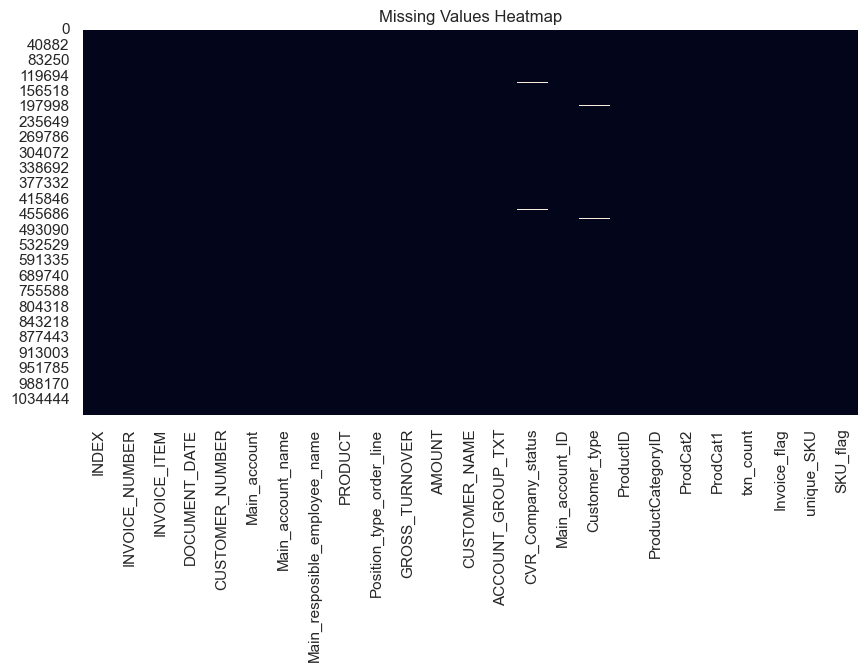


===== NUMERICAL COLUMN DISTRIBUTIONS =====


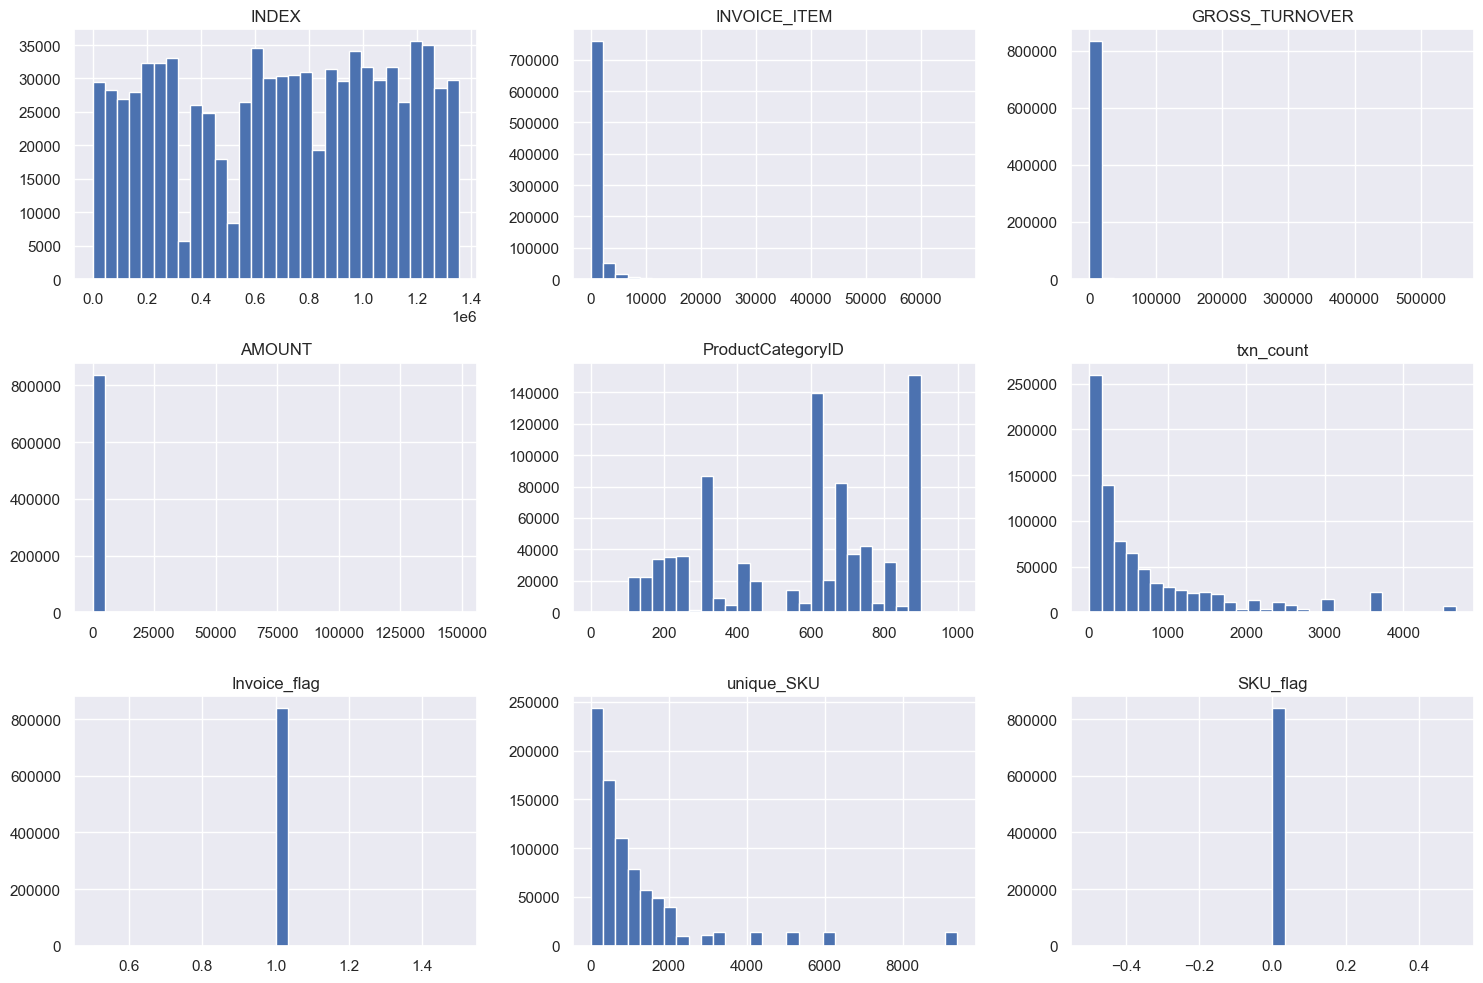


===== CATEGORICAL COLUMN DISTRIBUTIONS =====


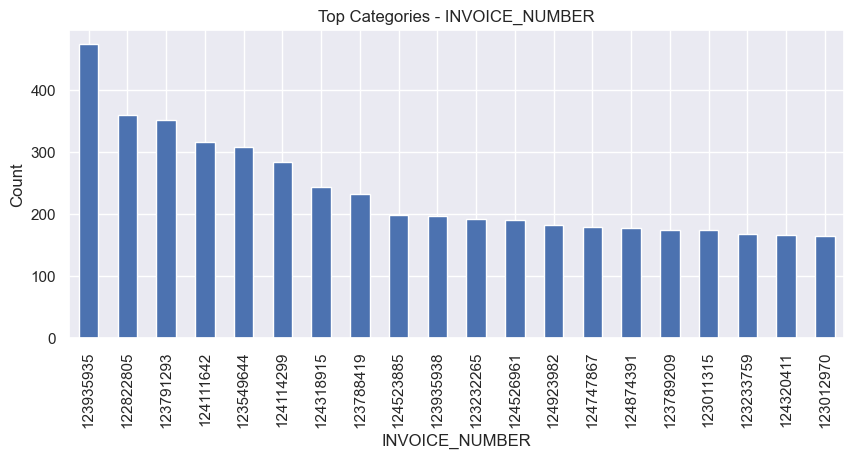

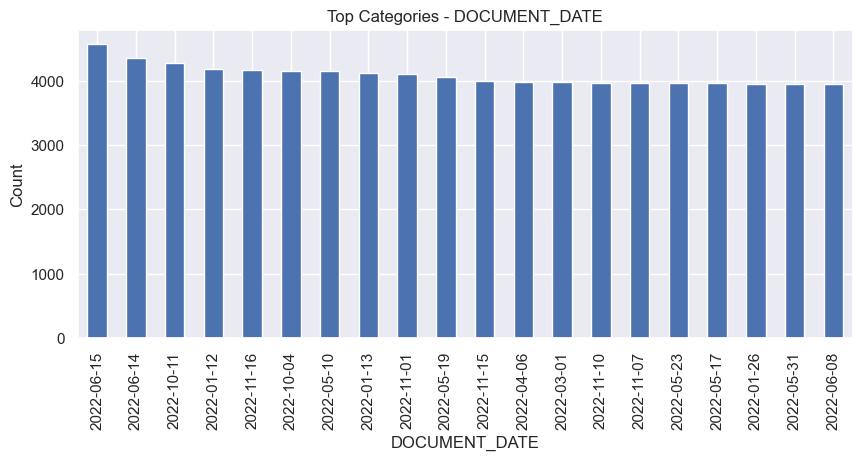

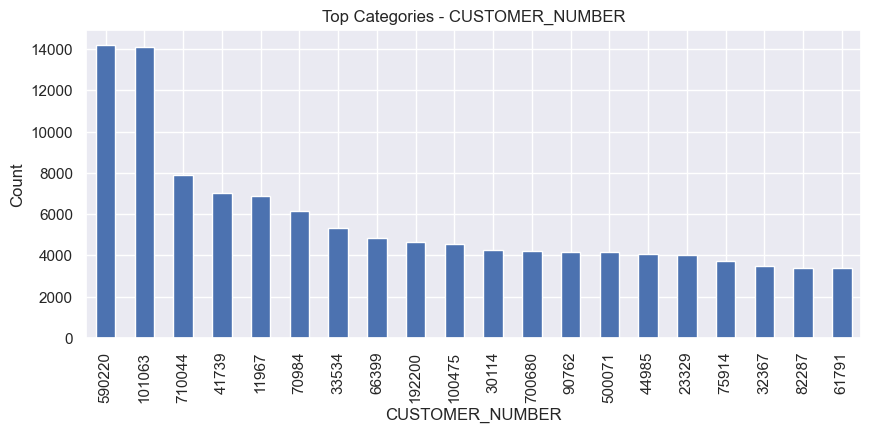

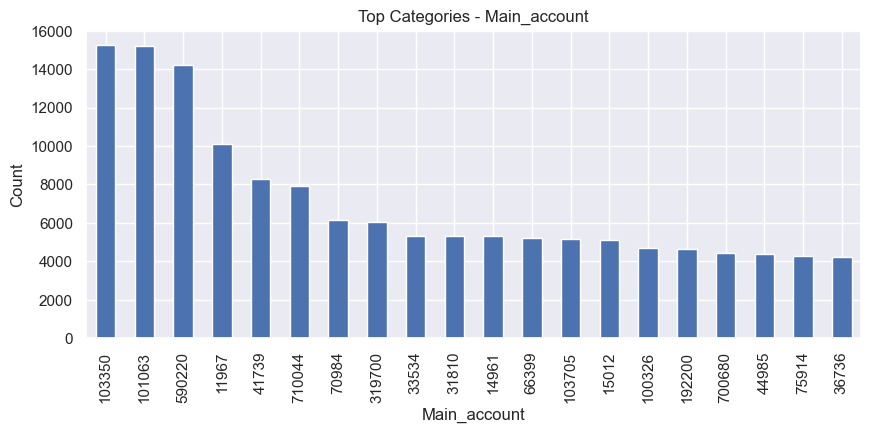

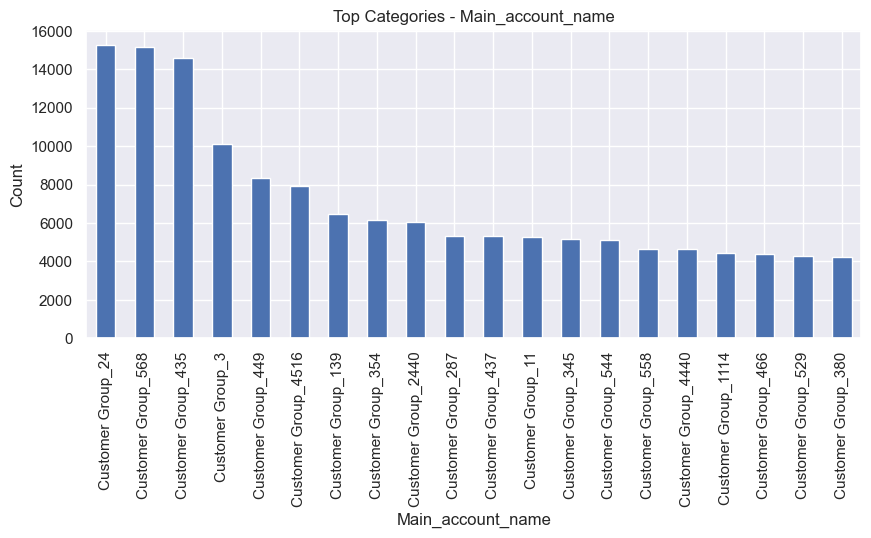

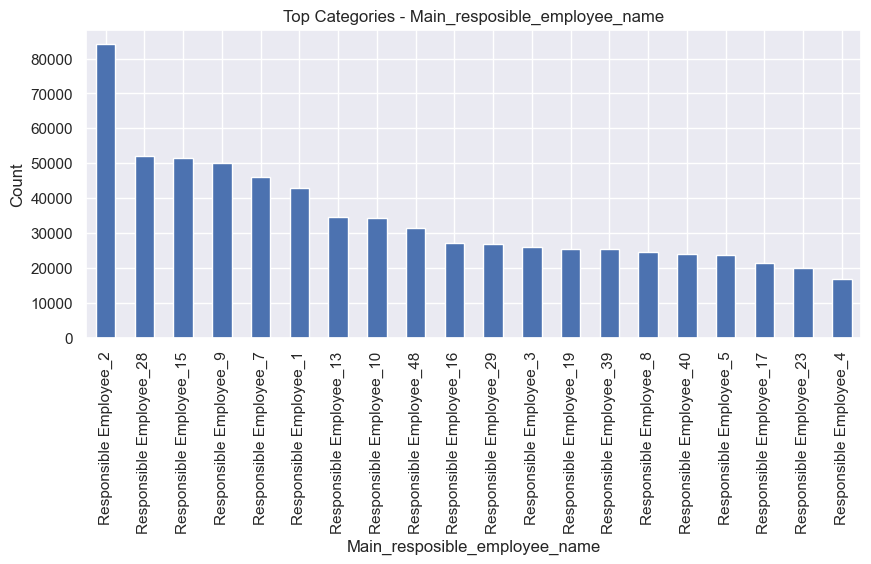

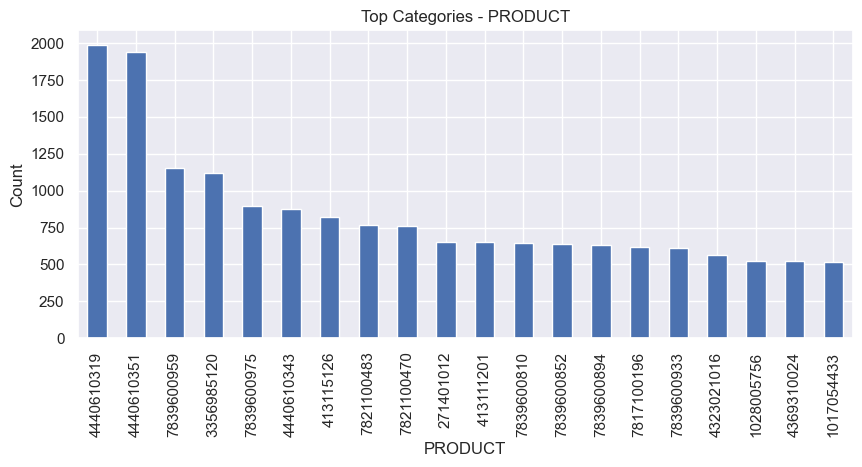

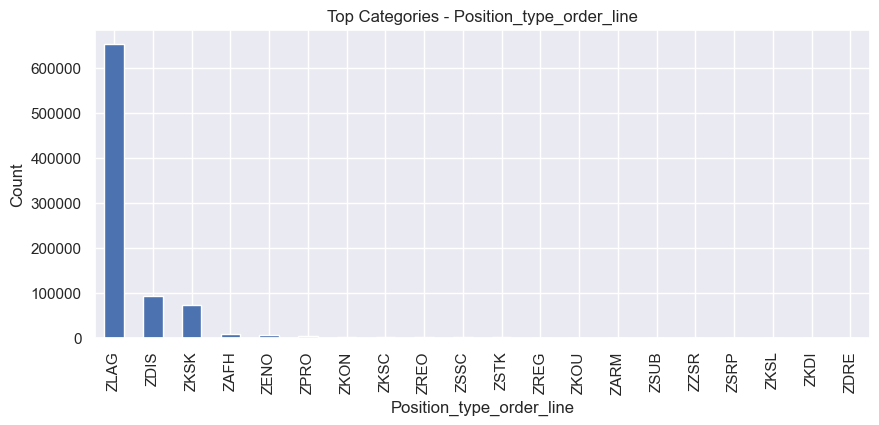

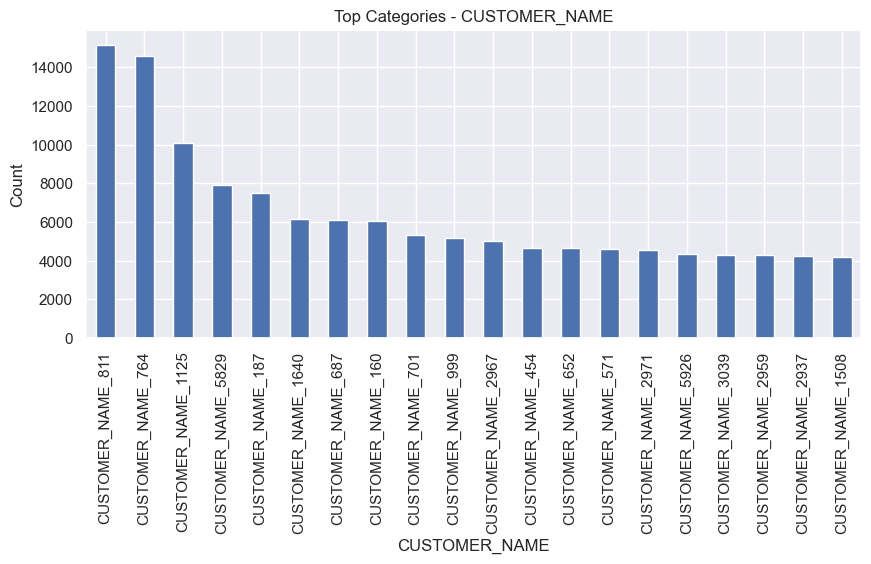

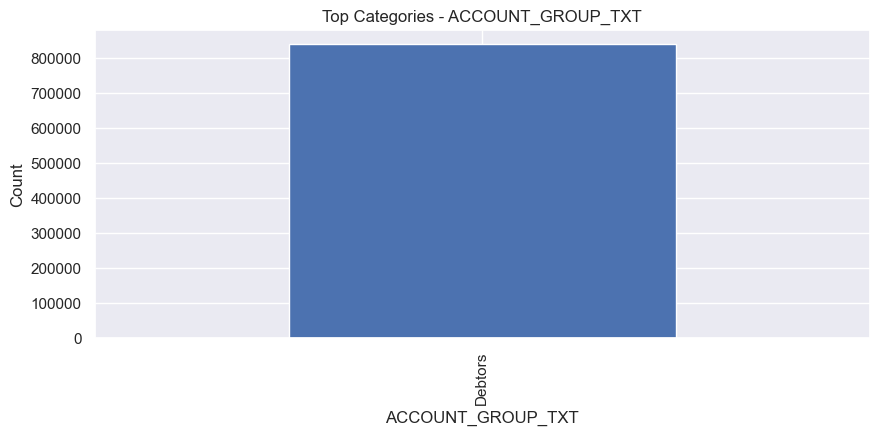

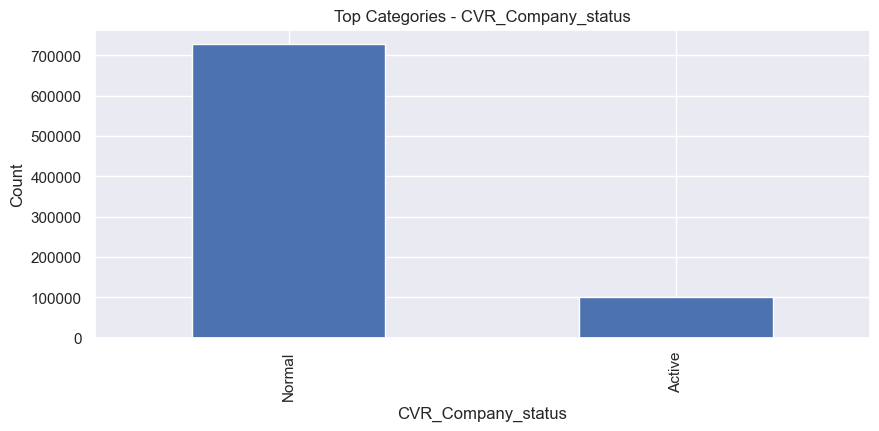

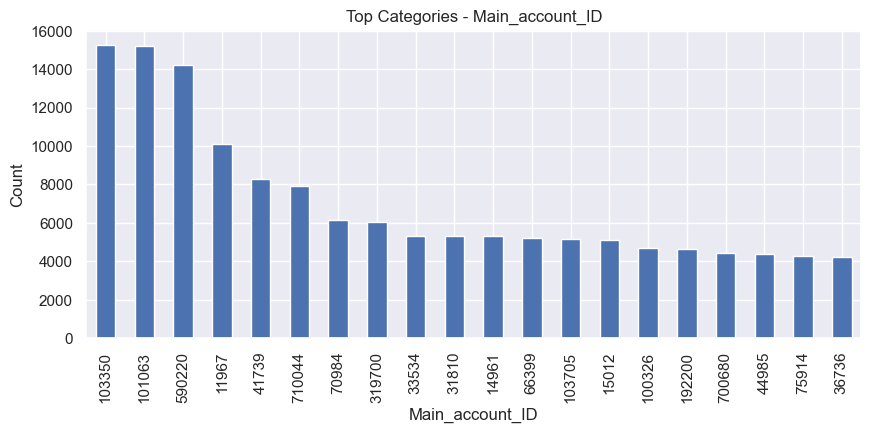

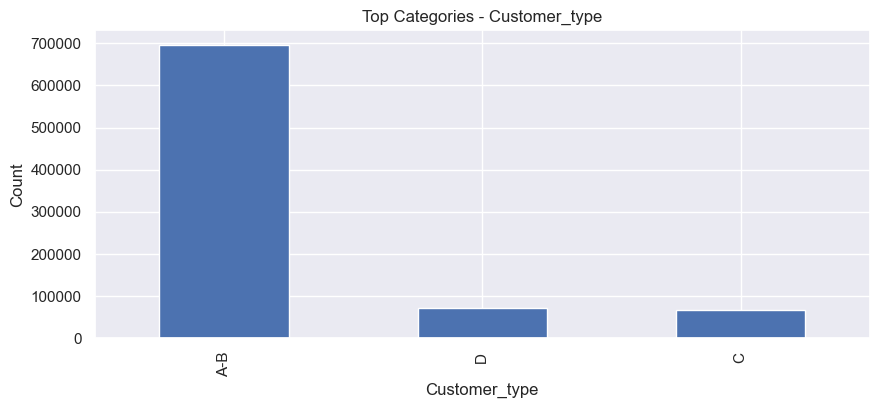

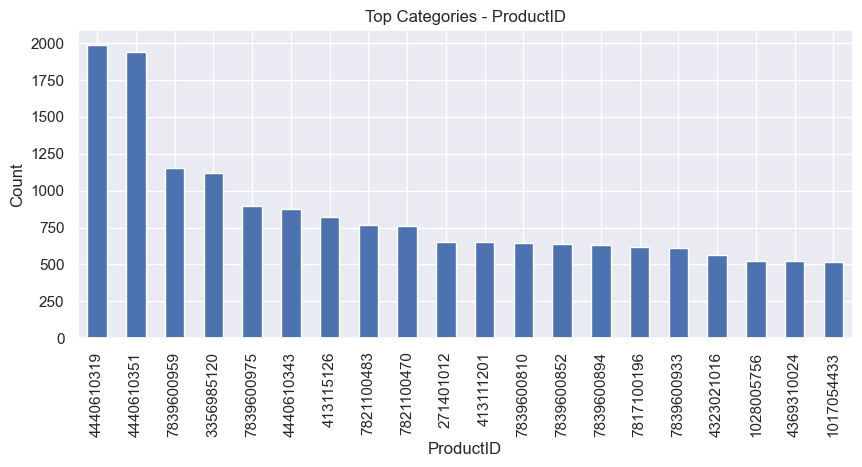

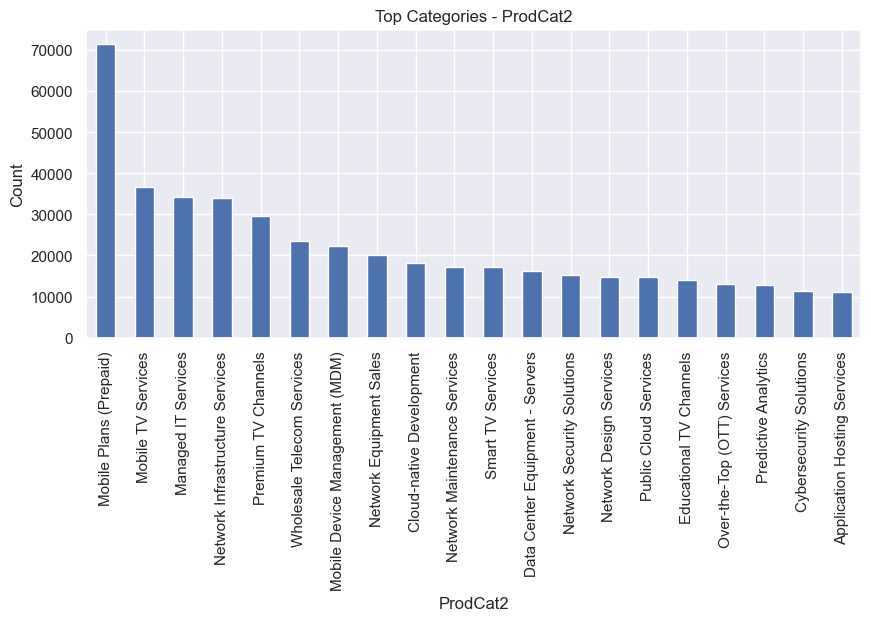

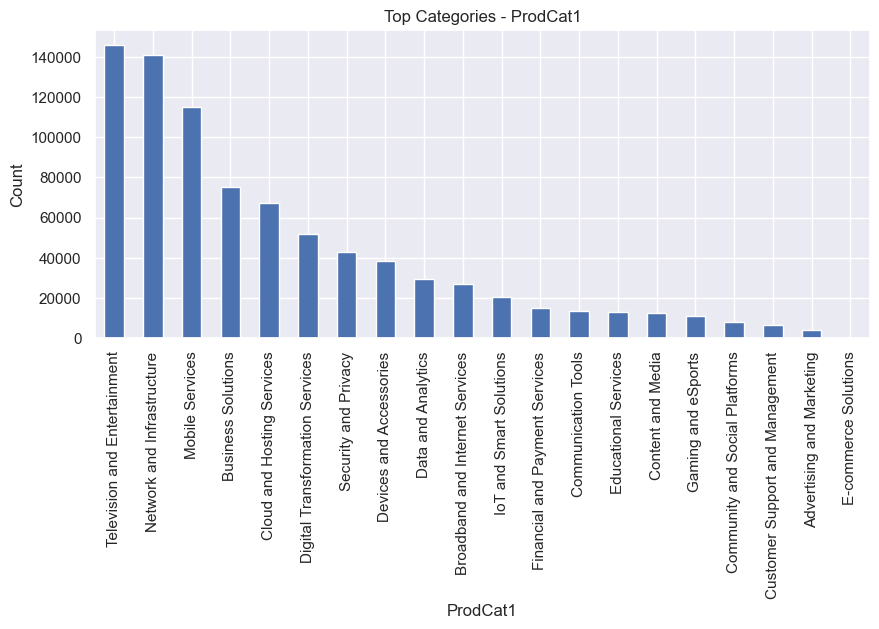

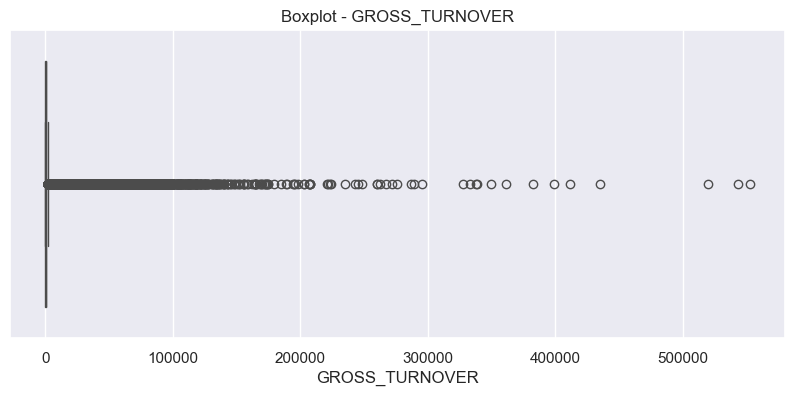

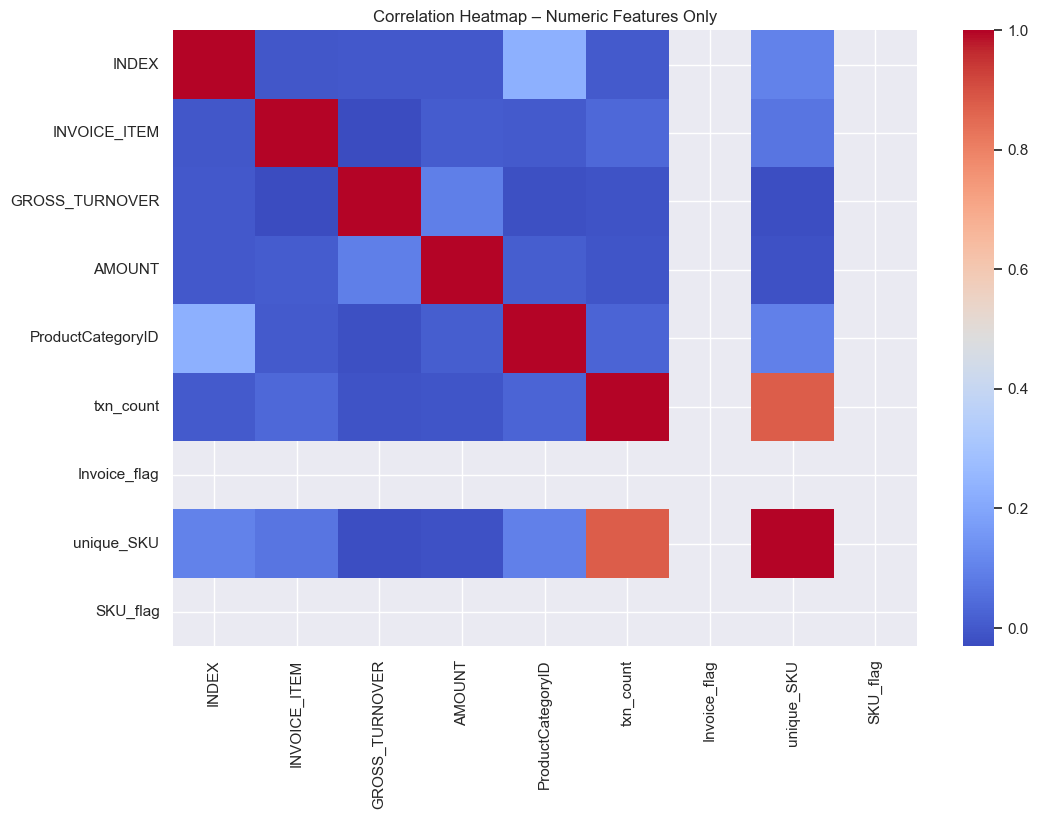


===== TOP 10 PRODUCTS BY REVENUE =====


PRODUCT
RAKB363      3355983.90
RAKB362      2438982.77
RAKB364      2071529.55
5731103611   1904999.60
JXAK         1790055.95
4356905595   1732353.70
7889405395   1604187.78
7889222002   1469636.96
5733101996   1464073.37
7889226684   1404596.03
Name: GROSS_TURNOVER, dtype: float64


===== TOP 10 CUSTOMERS BY REVENUE =====


CUSTOMER_NUMBER
140125   13079886.93
590220   10332575.64
11967     9003733.91
710044    8703852.31
32367     8635243.53
41935     8583418.15
101063    7538087.43
36903     7442968.60
100067    7392035.48
75914     6929234.65
Name: GROSS_TURNOVER, dtype: float64


🎉 EDA Completed!


In [75]:
# ============================================
# Task 2.1 - Exploratory Data Analysis (EDA)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_theme()

print("Starting EDA...")

# ------------------------------------------------------
# 1. Basic Overview
# ------------------------------------------------------
print("\n===== DATA INFO =====")
df_Filtered.info()

print("\n===== SUMMARY STATISTICS =====")
display(df_Filtered.describe(include='all'))

# ------------------------------------------------------
# 2. Missing Values Check
# ------------------------------------------------------
print("\n===== MISSING VALUES =====")
print(df_Filtered.isnull().sum())

plt.figure(figsize=(10,5))
sns.heatmap(df_Filtered.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# ------------------------------------------------------
# 3. Numerical Variables Distribution
# ------------------------------------------------------
numeric_cols = df_Filtered.select_dtypes(include=['int64', 'float64']).columns

print("\n===== NUMERICAL COLUMN DISTRIBUTIONS =====")
df_Filtered[numeric_cols].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# 4. Categorical Variables Distribution
# ------------------------------------------------------
cat_cols = df_Filtered.select_dtypes(include=['object']).columns

print("\n===== CATEGORICAL COLUMN DISTRIBUTIONS =====")
for col in cat_cols:
    plt.figure(figsize=(10,4))
    df_Filtered[col].value_counts().head(20).plot(kind='bar')
    plt.title(f"Top Categories - {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# ------------------------------------------------------
# 5. Outliers Check (Boxplots)
# ------------------------------------------------------
if "GROSS_TURNOVER" in df_Filtered.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df_Filtered["GROSS_TURNOVER"])
    plt.title("Boxplot - GROSS_TURNOVER")
    plt.show()

# ------------------------------------------------------
# 6. Correlation Heatmap
# ------------------------------------------------------
plt.figure(figsize=(12,8))
numeric_df = df_Filtered.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap – Numeric Features Only")
plt.show()


# ------------------------------------------------------
# 7. Business Insights (Optional but Good Practice)
# ------------------------------------------------------

print("\n===== TOP 10 PRODUCTS BY REVENUE =====")
display(df_Filtered.groupby("PRODUCT")["GROSS_TURNOVER"].sum().nlargest(10))

print("\n===== TOP 10 CUSTOMERS BY REVENUE =====")
display(df_Filtered.groupby("CUSTOMER_NUMBER")["GROSS_TURNOVER"].sum().nlargest(10))

# Monthly Sales Trend
if "INVOICE_DATE" in df_Filtered.columns:
    df_Filtered["INVOICE_DATE"] = pd.to_datetime(df_Filtered["INVOICE_DATE"])
    monthly_sales = df_Filtered.groupby(df_Filtered["INVOICE_DATE"].dt.to_period("M"))["GROSS_TURNOVER"].sum()

    plt.figure(figsize=(12,5))
    monthly_sales.plot()
    plt.title("Monthly Sales Trend")
    plt.ylabel("Gross Turnover")
    plt.xlabel("Month")
    plt.show()

print("\n🎉 EDA Completed!")


## Pareto Analysis

**Pareto Analysis** is a strategic decision-making tool used to prioritize actions based on the principle that a small number of causes typically lead to a large portion of the effects. Known as the 80/20 rule or the Pareto Principle, this concept is highly applicable in customer and product management, helping businesses focus on the most impactful areas to maximize efficiency and profitability.

## Key Concepts


**i) Pareto Principle (80/20 Rule):**

In the context of customers and products, this principle suggests that roughly 80% of a company’s revenue comes from 20% of its customers or products. Understanding this can help businesses focus their efforts on the most valuable segments.

**ii) Pareto Chart:**

A Pareto chart is a graphical tool that helps visualize and prioritize the most significant factors among a set. It combines a bar graph and a line graph, where bars represent individual values in descending order, and the line shows the cumulative total.

***An example of Pareto Chart and Pareto Analysis:***

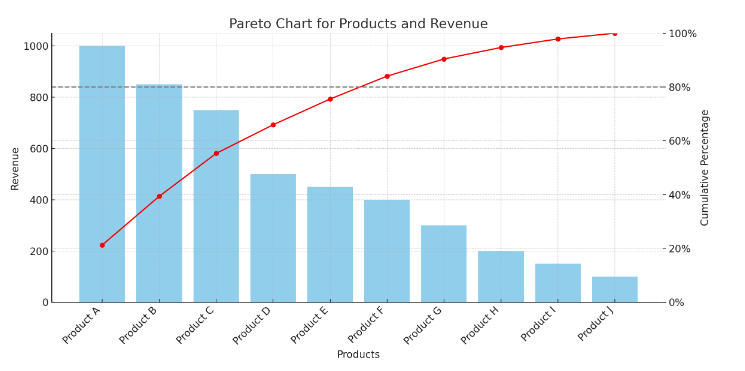

Here is the Pareto chart for products and their corresponding revenues. The chart consists of two key elements:

**Bar Chart:** The blue bars represent the individual revenue contributions of each product, sorted in descending order.

**Line Chart:** The red line shows the cumulative percentage of the total revenue contributed by the products. The horizontal 
gray dashed line indicates the 80% mark.

***Analysis***

- Product Contribution: The first few products (A, B, and C) generate a significant portion of the revenue, highlighting the "vital few" that follow the Pareto Principle.
- Cumulative Percentage: By the time we include Product E, the cumulative revenue reaches around 80% of the total, illustrating that a small number of products contribute to the majority of the revenue.

***Implications***

- Focus on Key Products: Efforts should be concentrated on optimizing and promoting these top-performing products to maximize revenue.
- Resource Allocation: Inventory, marketing, and development resources should be prioritized for these high-impact products to enhance business efficiency and profitability.
- Customer Strategies: Understanding which products are most valued by customers can help in tailoring marketing and customer engagement strategies.


Using Pareto analysis helps businesses identify and focus on the most impactful products, ensuring efficient use of resources and targeted efforts towards driving revenue growth. 

To execute the pareto analysis, you must create the required dataset. There are two levels of Product category in this dataset, use ProdCat2 for this analysis.

***Task 2.2: Create a new dataframe df_Pareto with the columns: ProdCat2, Gross_Turnover, Cumulative_GT, Cumulative_GT%***

*Hint: Cumulative_GT is Cumulative Gross Turnover which you can get by doing a cumulative sum on the Gross Turnover.*



In [76]:
# ===== Task 2.2 =====

# 1. Aggregate Gross Turnover by ProdCat2
df_Pareto = (
    df_Filtered
    .groupby('ProdCat2', as_index=False)['GROSS_TURNOVER']
    .sum()
)

# 2. Sort by turnover (descending)
df_Pareto = df_Pareto.sort_values('GROSS_TURNOVER', ascending=False).reset_index(drop=True)

# 3. Compute cumulative gross turnover
df_Pareto['Cumulative_GT'] = df_Pareto['GROSS_TURNOVER'].cumsum()

# 4. Compute cumulative percentage
total_turnover = df_Pareto['GROSS_TURNOVER'].sum()
df_Pareto['Cumulative_GT%'] = (df_Pareto['Cumulative_GT'] / total_turnover) * 100

# reset index
df_Pareto = df_Pareto.reset_index(drop=True)

# 5. Display for checking
df_Pareto.head()



,ProdCat2,GROSS_TURNOVER,Cumulative_GT,Cumulative_GT%
0,Mobile Plans (Postpaid),56125893.61,56125893.61,6.03
1,Network Infrastructure Services,40887789.80,97013683.41,10.42
2,Broadband Internet (Fiber),40535399.72,137549083.13,14.77
3,Mobile Plans (Prepaid),31599641.39,169148724.52,18.16
4,Wholesale Telecom Services,25938239.22,195086963.74,20.95


In [77]:
df_Pareto[df_Pareto['Cumulative_GT%'] <= 80]


,ProdCat2,GROSS_TURNOVER,Cumulative_GT,Cumulative_GT%
0,Mobile Plans (Postpaid),56125893.61,56125893.61,6.03
1,Network Infrastructure Services,40887789.80,97013683.41,10.42
2,Broadband Internet (Fiber),40535399.72,137549083.13,14.77
3,Mobile Plans (Prepaid),31599641.39,169148724.52,18.16
4,Wholesale Telecom Services,25938239.22,195086963.74,20.95
5,Enterprise networking equipment,25240509.84,220327473.58,23.66
6,Cloud and Hosting Services,23595223.59,243922697.18,26.19
7,5G Services,22058524.35,265981221.53,28.56
8,4G Services,20518542.81,286499764.34,30.76
9,Carrier Services,20127006.33,306626770.67,32.92


***Task 2.3: Arrive at a "Pareto filtered" dataset df_Pareto_80 with the top product categories that contribute to 80% of the Gross Turnover***

*Hint: There are 64 products that contribute to 80% of Gross Revenue turnover*

In [78]:
# 取得贡献累计营业额 ≤ 80% 的产品类别
df_Pareto_80 = df_Pareto[df_Pareto["Cumulative_GT%"] <= 80].copy()

df_Pareto_80.shape
df_Pareto_80.head()


,ProdCat2,GROSS_TURNOVER,Cumulative_GT,Cumulative_GT%
0,Mobile Plans (Postpaid),56125893.61,56125893.61,6.03
1,Network Infrastructure Services,40887789.80,97013683.41,10.42
2,Broadband Internet (Fiber),40535399.72,137549083.13,14.77
3,Mobile Plans (Prepaid),31599641.39,169148724.52,18.16
4,Wholesale Telecom Services,25938239.22,195086963.74,20.95


In [79]:
print("Number of ProdCat2 to reach 80%:", len(df_Pareto_80))

Number of ProdCat2 to reach 80%: 64


***Task 2.3: Display the Pareto Chart***

*Hint: Your Pareto Chart will look something like this*

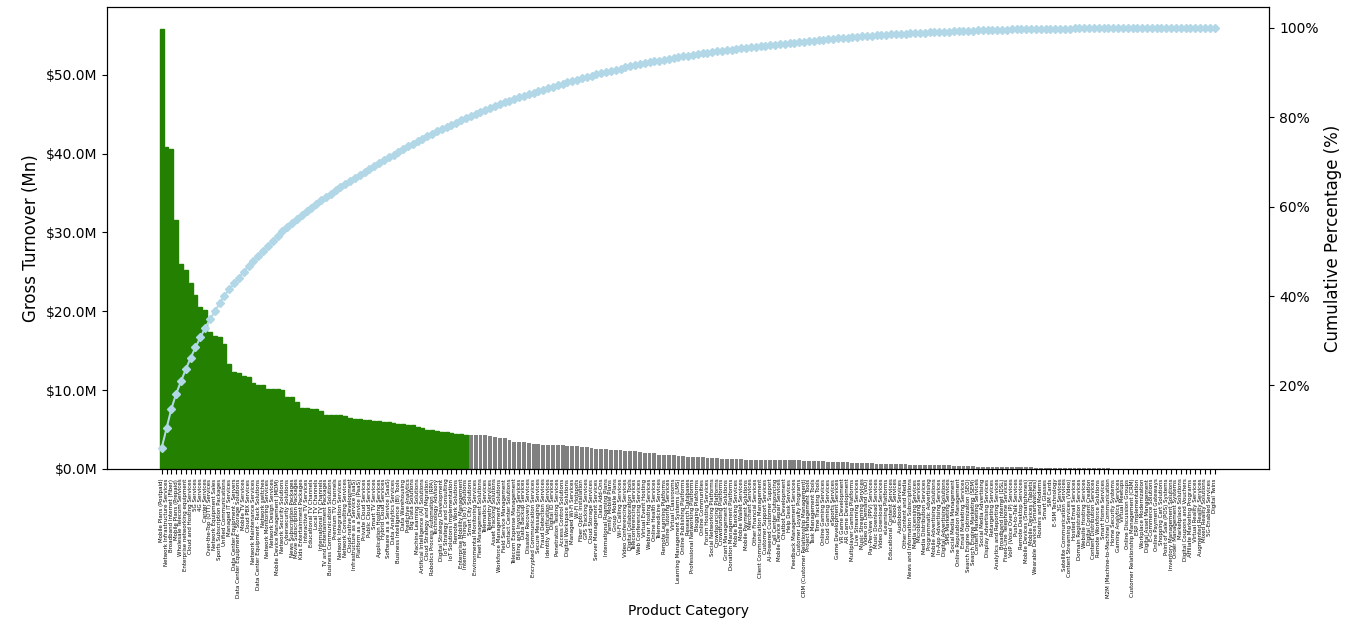


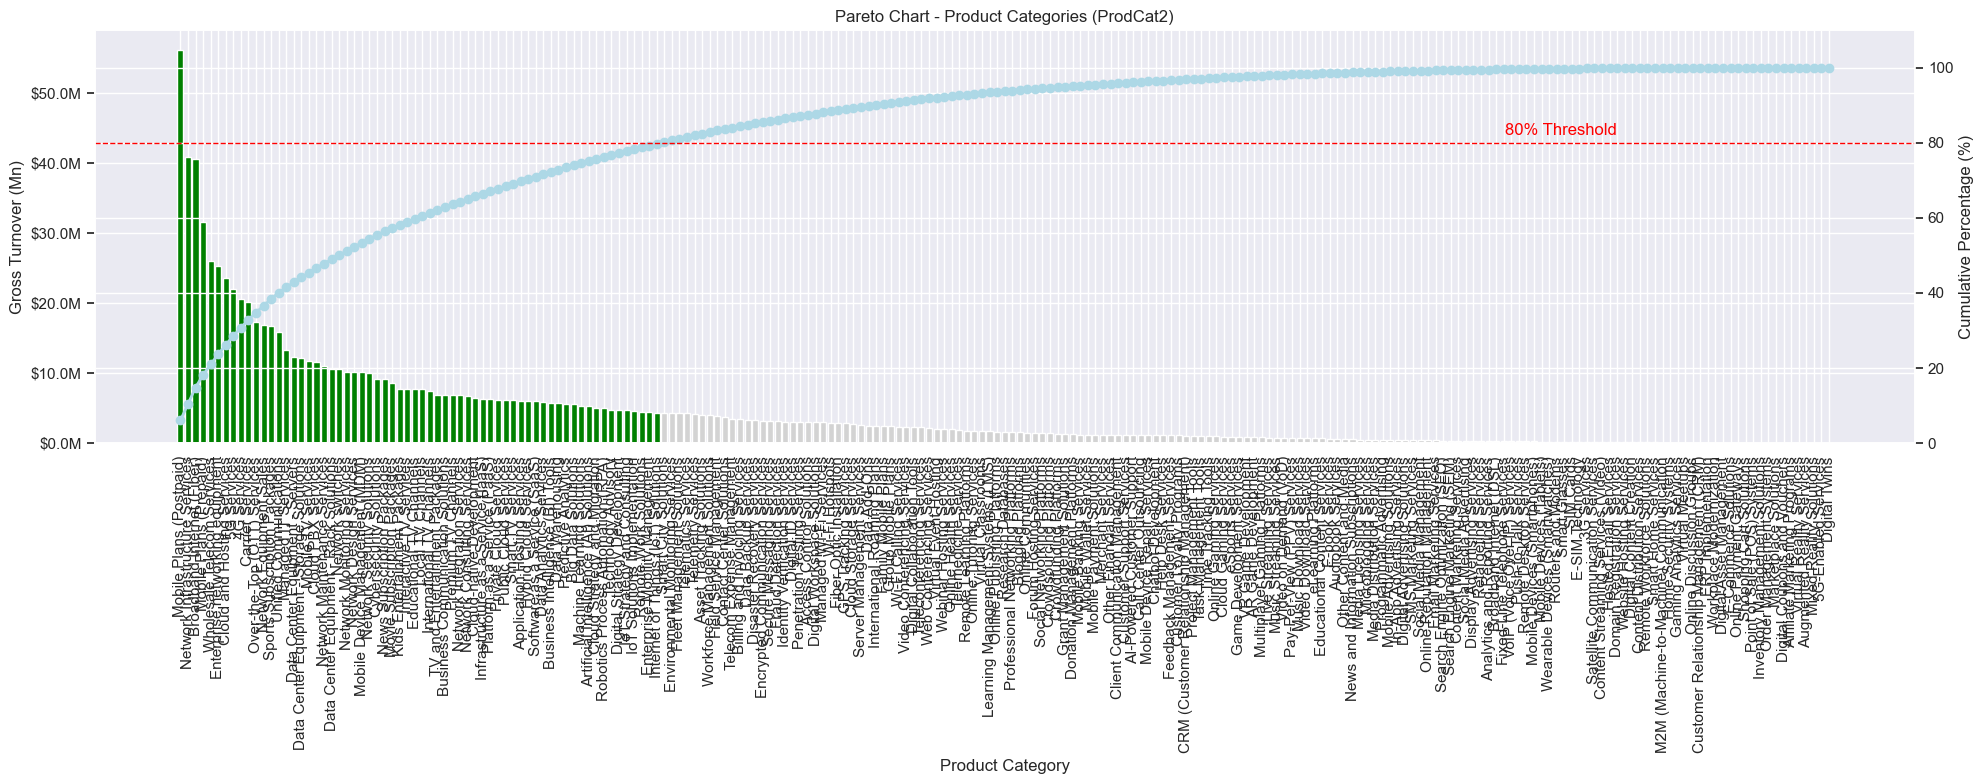

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
categories = df_Pareto['ProdCat2']
gross_turnover = df_Pareto['GROSS_TURNOVER']
cumulative_pct = df_Pareto['Cumulative_GT%']

# Create figure
fig, ax1 = plt.subplots(figsize=(20, 8))

# ----------------------
# BAR CHART (Left Y-axis)
# ----------------------
bars = ax1.bar(categories, gross_turnover,
               color=["green" if p <= 80 else "lightgray" for p in cumulative_pct])

ax1.set_xlabel("Product Category")
ax1.set_ylabel("Gross Turnover (Mn)")
ax1.tick_params(axis='x', rotation=90)

# Format left Y-axis labels to millions
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f"${x/1e6:.1f}M"))

# ----------------------
# CUMULATIVE LINE (Right Y-axis)
# ----------------------
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_pct, color="lightblue", marker="o", linewidth=2)
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.set_ylim(0, 110)     # Extend slightly beyond 100% for nicer layout

# Horizontal line at 80%
ax2.axhline(80, color="red", linestyle="--", linewidth=1)
ax2.text(len(categories)*0.8, 82, "80% Threshold", color="red")

plt.title("Pareto Chart - Product Categories (ProdCat2)")

plt.tight_layout()
plt.show()


***Task 2.4: Perform the necessary action to map the top products from Pareto Analysis to the previously created master dataframe df_Filtered and store this in a new dataframe df_Filtered_Pareto.***

*Hint: Think Joins?*

In [81]:
top_products = df_Pareto_80["ProdCat2"]

df_Filtered_Pareto = df_Filtered[df_Filtered["ProdCat2"].isin(top_products)].copy()

df_Filtered_Pareto.head()


,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,...,Main_account_ID,Customer_type,ProductID,ProductCategoryID,ProdCat2,ProdCat1,txn_count,Invoice_flag,unique_SKU,SKU_flag
0,47154,124195645,10,2022-09-09,15082,103350,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,...,103350,A-B,5737657492,605.00,Cloud Strategy and Migration,Digital Transformation Services,1575,1,2009,0
1,47184,124167744,70,2022-09-07,15082,103350,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,...,103350,A-B,4441429746,686.00,Predictive Analytics,Data and Analytics,1575,1,2009,0
3,48255,124385024,480,2022-10-10,15082,103350,Customer Group_24,Responsible Employee_17,31592006,ZLAG,...,103350,A-B,31592006,756.00,Mobile TV Services,Television and Entertainment,1575,1,2009,0
4,48315,123063686,10,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,...,103350,A-B,JSF 505,809.00,4G Services,Broadband and Internet Services,1575,1,2009,0
5,48316,123063686,30,2022-03-02,15082,103350,Customer Group_24,Responsible Employee_17,JSF 406,ZLAG,...,103350,A-B,JSF 406,809.00,4G Services,Broadband and Internet Services,1575,1,2009,0


In [82]:
df_Filtered_Pareto['ProdCat2'].nunique()


64

In the above dataset, you will notice that there are some columns that are repititive and redundant.

***Task 2.5: Remove the redundant columns and give a meaningful name to the repititive columns***

In [83]:
df_Filtered_Pareto.columns


Index(['INDEX', 'INVOICE_NUMBER', 'INVOICE_ITEM', 'DOCUMENT_DATE',
       'CUSTOMER_NUMBER', 'Main_account', 'Main_account_name',
       'Main_resposible_employee_name', 'PRODUCT', 'Position_type_order_line',
       'GROSS_TURNOVER', 'AMOUNT', 'CUSTOMER_NAME', 'ACCOUNT_GROUP_TXT',
       'CVR_Company_status', 'Main_account_ID', 'Customer_type', 'ProductID',
       'ProductCategoryID', 'ProdCat2', 'ProdCat1', 'txn_count',
       'Invoice_flag', 'unique_SKU', 'SKU_flag'],
      dtype='object')

In [84]:
# Step 1
cols_to_drop = [
    'INDEX',
    'Main_account'
]

df_Filtered_Pareto = df_Filtered_Pareto.drop(columns=cols_to_drop, errors='ignore')

#Step 2
df_Filtered_Pareto = df_Filtered_Pareto.rename(columns={
    'GROSS_TURNOVER': 'Gross_Turnover',
    'ProdCat2': 'Product_Category2',
    'AMOUNT': 'Amount',
    'Main_account_name': 'Account_Name',
    'txn_count': 'Transaction_count',
    'unique_SKU': 'Unique_SKU_count'
})

df_Filtered_Pareto


,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Account_Name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,Gross_Turnover,Amount,...,Main_account_ID,Customer_type,ProductID,ProductCategoryID,Product_Category2,ProdCat1,Transaction_count,Invoice_flag,Unique_SKU_count,SKU_flag
0,124195645,10,2022-09-09,15082,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,3870.22,1,...,103350,A-B,5737657492,605.00,Cloud Strategy and Migration,Digital Transformation Services,1575,1,2009,0
1,124167744,70,2022-09-07,15082,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,286.81,1,...,103350,A-B,4441429746,686.00,Predictive Analytics,Data and Analytics,1575,1,2009,0
3,124385024,480,2022-10-10,15082,Customer Group_24,Responsible Employee_17,31592006,ZLAG,52.31,1,...,103350,A-B,31592006,756.00,Mobile TV Services,Television and Entertainment,1575,1,2009,0
4,123063686,10,2022-03-02,15082,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,611.54,1,...,103350,A-B,JSF 505,809.00,4G Services,Broadband and Internet Services,1575,1,2009,0
5,123063686,30,2022-03-02,15082,Customer Group_24,Responsible Employee_17,JSF 406,ZLAG,434.45,1,...,103350,A-B,JSF 406,809.00,4G Services,Broadband and Internet Services,1575,1,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081111,123875314,420,2022-07-14,950003,Customer Group_356,Responsible Employee_23,7517900492,ZLAG,345.00,11,...,950003,A-B,7517900492,224.00,Network Maintenance Services,Network and Infrastructure,175,1,607,0
1081112,123296377,620,2022-04-08,950003,Customer Group_356,Responsible Employee_23,4486804411,ZLAG,2392.55,1,...,950003,A-B,4486804411,600.00,Wholesale Telecom Services,Network and Infrastructure,175,1,607,0
1081113,123662330,480,2022-06-02,980001,Customer Group_1106,Responsible Employee_7,4810002773,ZLAG,597.78,2,...,980001,A-B,4810002773,312.00,Data Center Equipment - Servers,Devices and Accessories,763,1,954,0
1081114,123561680,240,2022-05-02,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,207336.00,50,...,994332,A-B,7857002746,563.00,Cybersecurity Solutions,Security and Privacy,487,1,701,0


**This analysis gives an understanding of the top product portfolio of the company. This will be further used to perform customer segmentation.**

### 3. Customer Segmentation

The next part in this analysis is to find meaningful customer segments from the product purchase behaviour. 

You will use **KMeans Clustering Algorithm** for this.

### KMeans Algorithm 
The KMeans algorithm is a popular clustering technique used to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. Here are the steps involved in the KMeans algorithm:

**Initialization:**

- Choose the optimal number of clusters K, say 3 in this case. 
- Randomly select K data points from the dataset as the initial centroids (cluster centers).

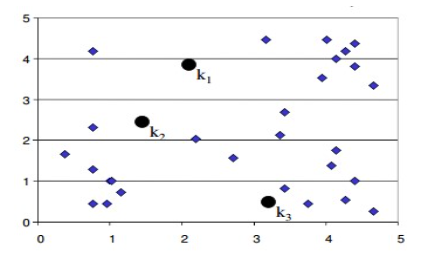

**Assignment Step:**

- Assign each data point to the nearest centroid. This is usually done by calculating the Euclidean distance between each data point and the centroids.
- Each data point is assigned to the cluster whose centroid is closest to it.

**Update Step:**

- Recalculate the centroids as the mean of all data points assigned to each cluster.
- The new centroid for each cluster is the average of the positions of all the data points in that cluster.

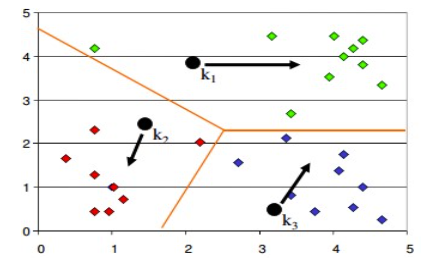

**Repeat:**

- Repeat the Assignment and Update steps until the centroids no longer change significantly or a specified number of iterations is reached.
- This convergence indicates that the clusters are stable, and the algorithm has found the optimal clustering.

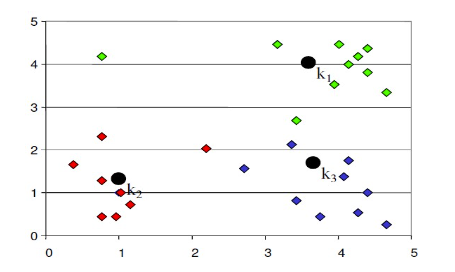

**Termination:**

- The algorithm terminates when the centroids have stabilized (i.e., they do not change significantly between iterations) or after a pre-defined number of iterations.



To execute this analysis, **Main Account** and **ProdCat1** (is a broader product category and is at the highest level in the product hierarchy) data will be used.

*Note: ProdCat2 level data is at a very granular level and performing clustering analysis on this might not give meaningful clusters.*

To proceed with the customer segmentation analysis, you need to menaingfully prepare the data.

***Task 3.1: Transform the data to feed to the clustering algorithm***

- Create a copy of the above dataframe and save it as **df_segment**
- Create a Primary Key: Concatenate the Main Account (ID) and Main Account Name
- Execute a groupby operation to calculate the annual turnover of each customer for each product (ProdCat1)
- Calculate the % spend by each customer across different product categories

The resultant dataframe will have the following columns:
- Primary Key
- ProdCat1
- Gross_Turnover
- Customer Spend %

In [85]:
df_Filtered_Pareto.columns

Index(['INVOICE_NUMBER', 'INVOICE_ITEM', 'DOCUMENT_DATE', 'CUSTOMER_NUMBER',
       'Account_Name', 'Main_resposible_employee_name', 'PRODUCT',
       'Position_type_order_line', 'Gross_Turnover', 'Amount', 'CUSTOMER_NAME',
       'ACCOUNT_GROUP_TXT', 'CVR_Company_status', 'Main_account_ID',
       'Customer_type', 'ProductID', 'ProductCategoryID', 'Product_Category2',
       'ProdCat1', 'Transaction_count', 'Invoice_flag', 'Unique_SKU_count',
       'SKU_flag'],
      dtype='object')

In [86]:
# Step 1: Copy dataframe
df_segment = df_Filtered_Pareto.copy()

In [87]:
# Step 2: Create Primary Key
df_segment['Primary_Key'] = df_segment['Main_account_ID'].astype(str) + "_" + df_segment['Account_Name']


In [88]:
df_Filtered_Pareto['Primary_Key'] = (
    df_Filtered_Pareto['Main_account_ID'].astype(str) + "_" + df_Filtered_Pareto['Account_Name']
)


In [89]:
# Step 3: Groupby customer x product category
df_grouped = df_segment.groupby(
    ['Primary_Key', 'ProdCat1'],
    as_index=False
)['Gross_Turnover'].sum()

In [90]:
# Step 4: Calculate % spend
df_grouped['Total_Turnover'] = df_grouped.groupby('Primary_Key')['Gross_Turnover'].transform('sum')
df_grouped['Customer_Spend_%'] = df_grouped['Gross_Turnover'] / df_grouped['Total_Turnover'] * 100

In [91]:
# Step 5: Keep only final columns
df_segment = df_grouped[['Primary_Key', 'ProdCat1', 'Gross_Turnover', 'Customer_Spend_%']]

df_segment.head()


,Primary_Key,ProdCat1,Gross_Turnover,Customer_Spend_%
0,100015_Customer Group_2149,Broadband and Internet Services,9250.04,44.25
1,100015_Customer Group_2149,Cloud and Hosting Services,124.69,0.60
2,100015_Customer Group_2149,Devices and Accessories,132.17,0.63
3,100015_Customer Group_2149,Digital Transformation Services,4106.33,19.65
4,100015_Customer Group_2149,Mobile Services,123.71,0.59


***Task 3.2: Pivot the dataset to create a matrix view of spend % of all customers on all products (ProdCat1). Save the dataframe as df_pivot. Create another dataframe df_clustering removing the primary key from the df_pivot dataframe.***

In [92]:
# Task 3.2 — Pivot data for clustering

df_pivot = df_grouped.pivot_table(
    index='Primary_Key',
    columns='ProdCat1',
    values='Customer_Spend_%',
    fill_value=0
)

In [93]:
# Keep original df for merging later
df_pivot = df_pivot.reset_index()


In [94]:
# Also create version without Primary Key for clustering
df_clustering = df_pivot.drop(columns=['Primary_Key'])


In [95]:
df_pivot.head()

ProdCat1,Primary_Key,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
0,100015_Customer Group_2149,44.25,0.00,0.60,0.00,0.63,19.65,0.00,0.59,23.84,0.00,10.44
1,100022_Customer Group_1631,0.00,18.88,6.79,0.00,12.55,0.00,0.00,5.43,10.35,44.61,1.39
2,100027_Customer Group_2392,34.30,0.00,1.03,1.42,0.00,0.00,0.00,35.76,4.64,0.00,22.84
3,100040_Customer Group_2150,0.00,5.05,4.29,0.00,0.00,0.00,0.00,0.66,89.41,0.00,0.59
4,100041_Customer Group_477,23.34,5.27,1.18,0.85,6.21,3.94,0.00,12.24,29.98,0.24,16.77


### The Elbow Method in KMeans Clustering

The Elbow Method is a commonly used technique to determine the optimal number of clusters (K) in KMeans clustering. It helps to balance between underfitting and overfitting by finding a point where adding more clusters doesn’t significantly improve the model performance. 

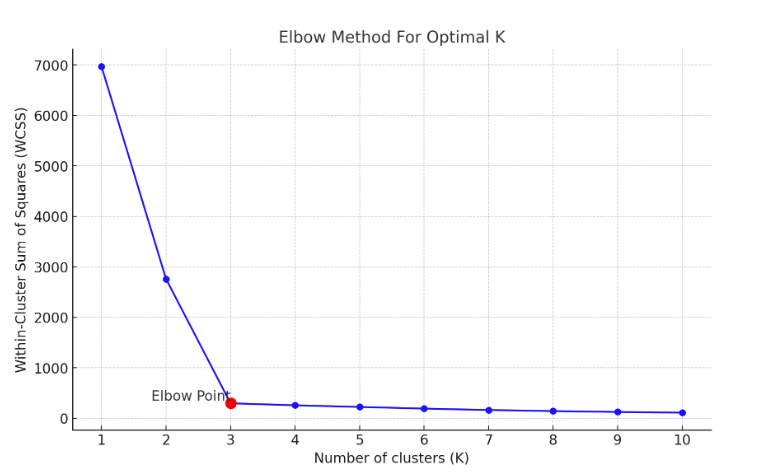

***Explanation of the Plot***

**WCSS (Within Cluster Sum of Squares) vs. Number of Clusters:**

- The x-axis represents the number of clusters (K).
- The y-axis represents the Within-Cluster Sum of Squares (WCSS), which measures the variance within each cluster.

**Plotting WCSS for Different K Values:**

- For each value of K (from 1 to 10), the KMeans algorithm is run, and the corresponding WCSS is calculated.
- The plot shows how WCSS decreases as the number of clusters increases.

**Elbow Point:**

- The red point marked on the plot indicates the "elbow point" where the rate of decrease in WCSS slows down.
- In this example, the elbow point is at K = 3. This suggests that 3 clusters are optimal for this dataset, as adding more clusters beyond this point results in only a marginal reduction in WCSS.

**Interpretation:**

- Before the Elbow Point: Adding more clusters significantly reduces WCSS, indicating that the clusters are becoming more defined and compact.
- After the Elbow Point: The reduction in WCSS slows down, meaning that adding more clusters doesn’t significantly improve the clustering.

**Conclusion** 

The Elbow Method helps to identify the optimal number of clusters by looking for the point where the WCSS starts to decrease at a slower rate, balancing model complexity and performance. In this case, the plot suggests that using 3 clusters is a good choice for the dataset.

***Task 3.3: Run K-Means clustering algorithm and identify the optimal number of clusters using Elbow Method***

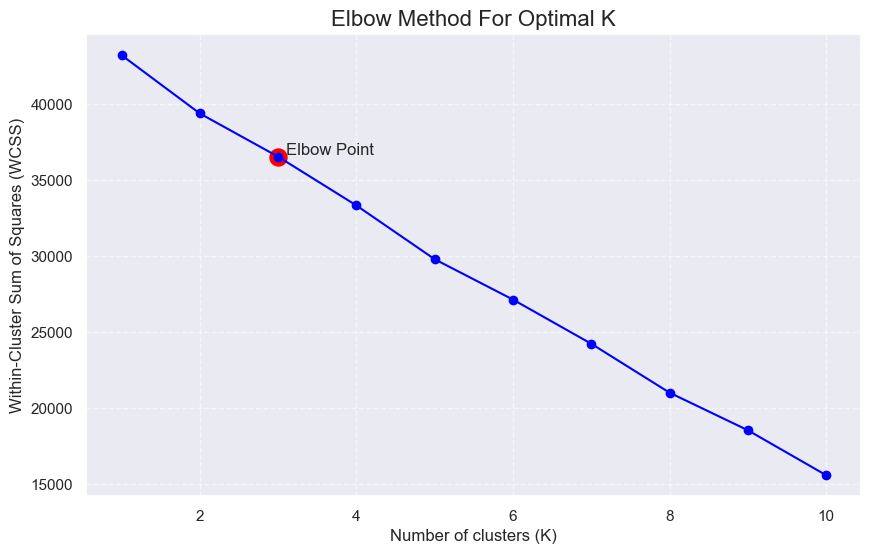

In [96]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Compute WCSS
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(10,6))
plt.plot(K_range, wcss, 'o-', color='blue')
plt.title("Elbow Method For Optimal K", fontsize=16)
plt.xlabel("Number of clusters (K)", fontsize=12)
plt.ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=12)

# Mark K=3
plt.scatter(3, wcss[2], color='red', s=150)
plt.text(3.1, wcss[2]+100, 'Elbow Point', fontsize=12)

# Grid
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


The Elbow Curve provides an optimal value for 'k' that is the number of clusters to be generated in the output. This value can be used as a guideline for the actual clustering run; one may vary the number of clusers in the output based on business need.

***Task 3.4: Run the KMeans algorithm with optimal number of clusters***

In [97]:
# Standardized data already created earlier as df_scaled

k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

df_pivot['Cluster'] = clusters


In [98]:
# Save segmentation
df_segmented = df_pivot[['Primary_Key', 'Cluster']]
df_segmented.head()

ProdCat1,Primary_Key,Cluster
0,100015_Customer Group_2149,2
1,100022_Customer Group_1631,1
2,100027_Customer Group_2392,2
3,100040_Customer Group_2150,2
4,100041_Customer Group_477,2


In [99]:
df_Filtered_Pareto.columns


Index(['INVOICE_NUMBER', 'INVOICE_ITEM', 'DOCUMENT_DATE', 'CUSTOMER_NUMBER',
       'Account_Name', 'Main_resposible_employee_name', 'PRODUCT',
       'Position_type_order_line', 'Gross_Turnover', 'Amount', 'CUSTOMER_NAME',
       'ACCOUNT_GROUP_TXT', 'CVR_Company_status', 'Main_account_ID',
       'Customer_type', 'ProductID', 'ProductCategoryID', 'Product_Category2',
       'ProdCat1', 'Transaction_count', 'Invoice_flag', 'Unique_SKU_count',
       'SKU_flag', 'Primary_Key'],
      dtype='object')

***Task 3.5: From the above clusters, create cluster profile***

***Task 3.5.1: Map each customers to their respective cluster in df_segment dataset***

In [100]:
# Task 3.5.1 — Map each customer to their cluster

df_segmented_mapping = df_Filtered_Pareto.merge(
    df_segmented[['Primary_Key', 'Cluster']],
    on='Primary_Key',
    how='left'
)

df_segmented_mapping.head()


,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Account_Name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,Gross_Turnover,Amount,...,ProductID,ProductCategoryID,Product_Category2,ProdCat1,Transaction_count,Invoice_flag,Unique_SKU_count,SKU_flag,Primary_Key,Cluster
0,124195645,10,2022-09-09,15082,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,3870.22,1,...,5737657492,605.00,Cloud Strategy and Migration,Digital Transformation Services,1575,1,2009,0,103350_Customer Group_24,2
1,124167744,70,2022-09-07,15082,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,286.81,1,...,4441429746,686.00,Predictive Analytics,Data and Analytics,1575,1,2009,0,103350_Customer Group_24,2
2,124385024,480,2022-10-10,15082,Customer Group_24,Responsible Employee_17,31592006,ZLAG,52.31,1,...,31592006,756.00,Mobile TV Services,Television and Entertainment,1575,1,2009,0,103350_Customer Group_24,2
3,123063686,10,2022-03-02,15082,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,611.54,1,...,JSF 505,809.00,4G Services,Broadband and Internet Services,1575,1,2009,0,103350_Customer Group_24,2
4,123063686,30,2022-03-02,15082,Customer Group_24,Responsible Employee_17,JSF 406,ZLAG,434.45,1,...,JSF 406,809.00,4G Services,Broadband and Internet Services,1575,1,2009,0,103350_Customer Group_24,2


In [101]:
df_segmented_mapping['Cluster'].value_counts()


Cluster
2    386066
0    188207
1     70685
Name: count, dtype: int64

***Task 3.5.2: Create a cluster profile table with the cluster label, Gross Turnover for each cluster, Number of unique customers in each cluster, % share of Gross Turnover of each cluster for each product.***

*Illustrative: Here is a snapshot of the desired cluster profile:*
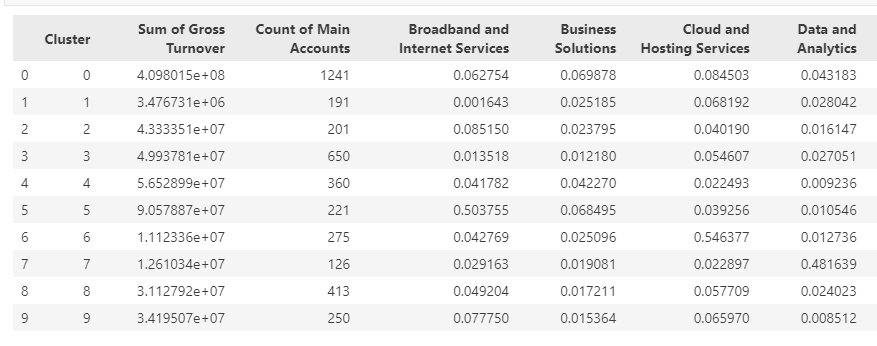

In [102]:
# Task 3.5.2 — Cluster Profile Table

cluster_profile = df_segmented_mapping.groupby('Cluster').agg(
    **{
        'Sum of Gross Turnover': ('Gross_Turnover', 'sum'),
        'Count of Main Accounts': ('Primary_Key', 'nunique')
    }
)

# Select only ProdCat1 percentage columns from pivot
prod_cols = df_pivot.columns.drop(['Primary_Key', 'Cluster'])

# Add average % share by product category
cluster_profile = cluster_profile.join(
    df_pivot.groupby('Cluster')[prod_cols].mean()
)

cluster_profile.reset_index(inplace=True)

cluster_profile

,Cluster,Sum of Gross Turnover,Count of Main Accounts,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Data and Analytics,Devices and Accessories,Digital Transformation Services,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
0,0,274414970.84,1265,5.49,3.39,5.09,2.22,14.41,17.49,0.20,6.91,9.16,2.06,33.59
1,1,91044080.82,979,1.23,1.70,23.56,2.65,2.29,3.00,0.05,30.70,8.99,18.60,7.23
2,2,377585234.61,1685,8.99,6.26,5.92,7.95,3.81,4.84,1.31,7.36,41.00,2.62,9.94


### 4. Prepare data for Tableau Dashboard

From here, you will be creating the visualizations in Tableau. But before, creating the required visualizations in Tableau, you should prepare the data.

Here is a reference of how data for visualizations for **Customer Segmentation** looks like:

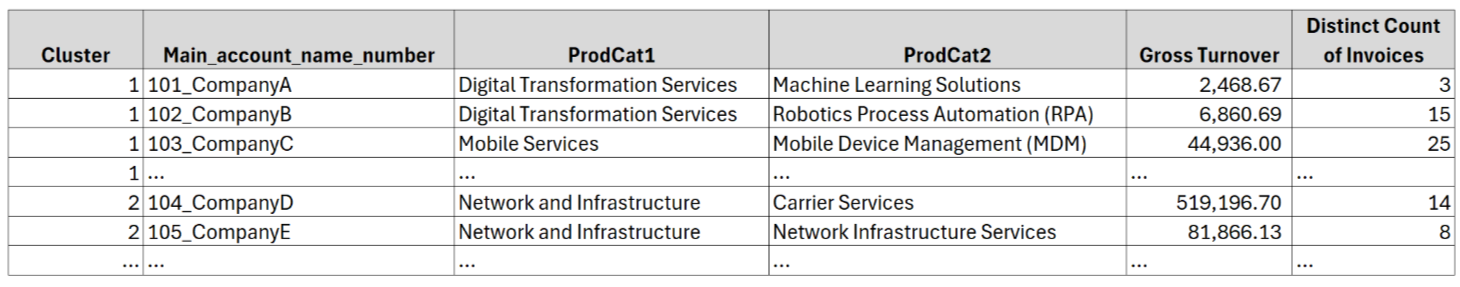






Here is a reference of how data for visualizations for **Product Categorization** looks like:

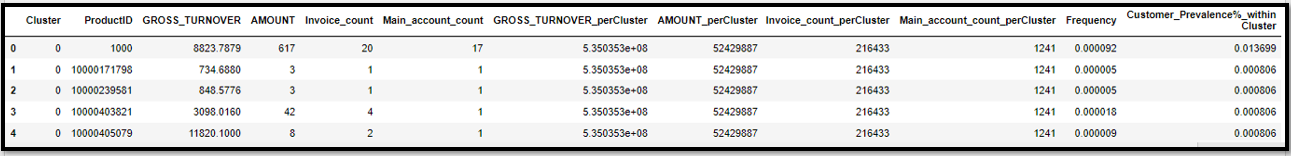

where:

- Product ID: SKU ID
- Gross Turnover (sum), Amount (sum), Invoice_count (distinct count of invoices), Main_account_count (distinct count of main accounts): fields aggregated at SKU level
- Above columns with _percluster: fields aggregated at cluster level
- Frequency (%) : number of transactions the SKU appeared on, when compared to all transactions in a cluster
- Customer Prevalence (%) within cluster : Percentage of customers within a cluster who purchase the SKU



In [103]:
df_segmented_mapping.head()


,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Account_Name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,Gross_Turnover,Amount,...,ProductID,ProductCategoryID,Product_Category2,ProdCat1,Transaction_count,Invoice_flag,Unique_SKU_count,SKU_flag,Primary_Key,Cluster
0,124195645,10,2022-09-09,15082,Customer Group_24,Responsible Employee_17,5737657492,ZLAG,3870.22,1,...,5737657492,605.00,Cloud Strategy and Migration,Digital Transformation Services,1575,1,2009,0,103350_Customer Group_24,2
1,124167744,70,2022-09-07,15082,Customer Group_24,Responsible Employee_17,4441429746,ZLAG,286.81,1,...,4441429746,686.00,Predictive Analytics,Data and Analytics,1575,1,2009,0,103350_Customer Group_24,2
2,124385024,480,2022-10-10,15082,Customer Group_24,Responsible Employee_17,31592006,ZLAG,52.31,1,...,31592006,756.00,Mobile TV Services,Television and Entertainment,1575,1,2009,0,103350_Customer Group_24,2
3,123063686,10,2022-03-02,15082,Customer Group_24,Responsible Employee_17,JSF 505,ZLAG,611.54,1,...,JSF 505,809.00,4G Services,Broadband and Internet Services,1575,1,2009,0,103350_Customer Group_24,2
4,123063686,30,2022-03-02,15082,Customer Group_24,Responsible Employee_17,JSF 406,ZLAG,434.45,1,...,JSF 406,809.00,4G Services,Broadband and Internet Services,1575,1,2009,0,103350_Customer Group_24,2


In [104]:
# Task 4.1: Prepare Customer Segmentation View

df_customer_segmentation = df_segmented_mapping.groupby(
    ['Cluster', 'Primary_Key', 'ProdCat1', 'Product_Category2'],  # ProdCat2
    as_index=False
).agg(
    Gross_Turnover=('Gross_Turnover', 'sum'),
    Invoice_Count=('INVOICE_NUMBER', 'nunique')
)

df_customer_segmentation.head()


,Cluster,Primary_Key,ProdCat1,Product_Category2,Gross_Turnover,Invoice_Count
0,0,100049_Customer Group_2730,Business Solutions,Enterprise Mobility Management,257.83,1
1,0,100049_Customer Group_2730,Business Solutions,Managed IT Services,1222.26,1
2,0,100049_Customer Group_2730,Television and Entertainment,International TV Channels,5204.45,3
3,0,100049_Customer Group_2730,Television and Entertainment,Over-the-Top (OTT) Services,18710.69,5
4,0,100049_Customer Group_2730,Television and Entertainment,Smart TV Services,145.90,2


In [105]:
df_customer_segmentation.to_csv("Customer_Segmentation.csv", index=False)


In [106]:
# Task 4.2: SKU-Level Categorization per Cluster

df_sku = df_segmented_mapping.groupby(
    ['Cluster', 'ProductID'], 
    as_index=False
).agg(
    GROSS_TURNOVER=('Gross_Turnover', 'sum'),
    AMOUNT=('Amount', 'sum'),
    Invoice_count=('INVOICE_NUMBER', 'nunique'),
    Main_account_count=('Primary_Key', 'nunique')
)


In [107]:
# ---- Add cluster totals for % calculations ----

cluster_invoice = df_segmented_mapping.groupby('Cluster')['INVOICE_NUMBER'].nunique()
cluster_customers = df_segmented_mapping.groupby('Cluster')['Primary_Key'].nunique()
cluster_gt = df_segmented_mapping.groupby('Cluster')['Gross_Turnover'].sum()

cluster_totals = pd.concat(
    [cluster_invoice, cluster_customers, cluster_gt],
    axis=1
).reset_index()

cluster_totals.columns = ['Cluster', 'Cluster_Invoices', 'Cluster_Customers', 'Cluster_GT']

In [108]:
# Merge totals back
df_sku = df_sku.merge(cluster_totals, on='Cluster', how='left')


In [109]:
df_sku['Frequency'] = df_sku['Invoice_count'] / df_sku['Cluster_Invoices']
df_sku['Customer_Prevalence_%'] = (
    df_sku['Main_account_count'] / df_sku['Cluster_Customers'] * 100
)


In [110]:
df_sku.head()

,Cluster,ProductID,GROSS_TURNOVER,AMOUNT,Invoice_count,Main_account_count,Cluster_Invoices,Cluster_Customers,Cluster_GT,Frequency,Customer_Prevalence_%
0,0,1000,1248.42,94,3,3,76361,1265,274414970.84,0.00,0.24
1,0,10000473963,1174.20,24,1,1,76361,1265,274414970.84,0.00,0.08
2,0,10000523668,413.60,9,1,1,76361,1265,274414970.84,0.00,0.08
3,0,10000561016,167.09,9,2,1,76361,1265,274414970.84,0.00,0.08
4,0,10000739360,1259.05,207,1,1,76361,1265,274414970.84,0.00,0.08


In [111]:
df_sku.to_csv("SKU_Cluster_Analysis.csv", index=False)


In [112]:
# Insert your codes here

In [113]:
# Insert your codes here

***The End***